<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_04_4_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 4: Large Language Models**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 4 Material

* Part 4.1: Introduction to Large Language Models (LLMs)
* Part 4.2: Chatbots
* Part 4.3: Image Generation with StableDiffusion
* **Part 4.4: Agentic AI**


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.


### Verify GEMINI_API_KEY

In order to run the code in this lesson you will need to have your `GEMINI_API_KEY` properly installed in your Colab **Secrets**. Detailed steps for purchasing your `GENAI_API_KEY` and installing it in your Colab notebook Secrets was provided previously in a separate hand-out.

Run the code in the next cell to see if your `GEMINI_API_KEY` is installed correctly. Make sure to Grant Access for your notebook to use your API key if Colab requests this action.

In [ ]:
# Verify GEMINI_API_KEY

import os
from google import genai
from google.genai import types
from google.colab import userdata

# Check if API key is properly loaded
try:
    GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
    print("API key loaded successfully!")
    print(f"Key length: {len(GOOGLE_API_KEY)}")
except Exception as e:
    print(f"Error loading API key: {e}")
    print("Please set your API key in Google Colab:")
    print("1. Go to Secrets in the left sidebar")
    print("2. Create a new secret named 'GEMINI_API_KEY'")
    print("3. Paste your GEMINI API key")


API key loaded successfully!
Key length: 39


1. You may see this message when you run this cell:


![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image08C.png)

> If you do see this popup just click on `Grant access`.


2. If your `GENAI_API_KEY` is correctly installed you should see something _similar_ to the following output.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image09C.png)

3. However, if you see the following output...

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image10C.png)

> you will need to correct the error before you can continue. Ask your Instructor or TA for help if you can resolve the error yourself.

### Install Google Genai packages

Run the next code cell to install the software packages needed for this lesson.

In [ ]:
# Install & Configure
!pip install -q -U google-genai

import os
from google import genai
from google.genai import types
from google.colab import userdata

# Retrieve API Key
try:
    GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")
except Exception as e:
    print("Error: Please add 'GEMINI_API_KEY' to your Colab Secrets.")

# Initialize Client
client = genai.Client(api_key=GOOGLE_API_KEY)
MODEL_ID = "gemini-2.0-flash-exp" # The Agentic Model

print("Environment Ready.")

Environment Ready.


If the code is correct, you should see the following output:

```text
Environment Ready.
```

Or you might see the following:

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image01D.png)

Don't worry about the error message.

### **Optional YouTube Video**

Watch this YouTube video to learn more about Agentic AI.

In [ ]:
from IPython.display import HTML
video_id = "EDb37y_MhRw"

HTML(f"""
<iframe width="560" height="315"
  src="https://www.youtube.com/embed/{video_id}"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
  allowfullscreen
  referrerpolicy="strict-origin-when-cross-origin"> </iframe>
""")

# **Introduction to Agentic AI**

**Agentic AI** represents a fundamental shift in how artificial intelligence systems interact with the world. Unlike traditional AI models that respond to prompts with static outputs, agentic AI systems can autonomously plan, reason, and take actions to accomplish complex goals. These systems don't just answer questions—they actively work toward objectives, breaking down tasks, using tools, and adapting their approach based on feedback.

### **What Makes AI "Agentic"?**

At its core, agentic AI is characterized by several key capabilities. First, these systems exhibit goal-directed behavior, meaning they can take a high-level objective and determine the steps needed to achieve it. Second, they possess the ability to use tools—whether that's browsing the web, executing code, reading files, or interacting with APIs. Third, agentic systems demonstrate iterative reasoning, allowing them to evaluate their progress, recognize when something isn't working, and adjust their strategy accordingly.

Consider the difference between asking a traditional chatbot to help you research a topic versus asking an agentic system. The chatbot provides information from its training data. The agentic system might search the web for recent sources, synthesize findings across multiple articles, organize the information into a structured document, and save it for you—all from a single request.

### **Why Agentic AI Matters**

The importance of agentic AI lies in its potential to dramatically expand what humans can accomplish with AI assistance. Rather than serving as sophisticated autocomplete tools, agentic systems function more like capable assistants that can handle multi-step workflows independently.

For individuals, this means being able to delegate tedious, time-consuming tasks that previously required manual effort across multiple applications. For organizations, agentic AI opens possibilities for automating complex business processes that involve judgment calls and dynamic decision-making—tasks that rule-based automation could never handle.

The technology also matters because it represents a more natural way for humans to work with AI. Instead of crafting perfect prompts and manually orchestrating a sequence of interactions, users can express their intent at a higher level and trust the system to figure out the details.

### **Challenges and Considerations**

Of course, increased autonomy brings increased responsibility. Agentic AI systems must be designed with robust safety measures, clear boundaries, and appropriate human oversight. Questions of trust, verification, and control become paramount when AI systems can take actions in the real world. The most effective agentic systems are those that balance capability with transparency—powerful enough to be genuinely useful, but designed to keep humans informed and in control.

### **Looking Ahead**

Agentic AI is still in its early stages, but its trajectory suggests a future where AI becomes less of a tool we use and more of a collaborator we work alongside. As these systems become more capable and more widely deployed, they have the potential to reshape how we approach work, creativity, and problem-solving. Understanding what agentic AI is and how it operates is increasingly essential for anyone looking to leverage the next generation of artificial intelligence.

## **AI Agents**

In this lesson, we are moving beyond simple "chatbots" to explore **AI Agents**. While a standard Large Language Model (LLM) like ChatGPT waits for you to ask a question, an **AI Agent** is designed to act, reason, and complete multi-step goals with minimal human intervention.

### **What is an AI Agent?**

An AI Agent is an autonomous system that can **perceive** its environment, **reason** about how to achieve a goal, and **execute** actions using external tools (like Python scripts, web searches, or database queries).

In the context of Python programming, think of an agent as a "wrapper" around an LLM that gives it:
* **Planning:** The ability to break a complex prompt (e.g., "Find the IL10 gene sequence and check for common mutations") into smaller sub-tasks.
* **Tool Use:** The ability to write and run code, call APIs (like NCBI or PubMed), or read local files.
* **Memory:** The ability to remember what worked or failed in previous steps to refine its strategy.

### **Why are AI Agents Important for Science?**

For biology and pre-med students, AI agents are becoming "digital lab partners." They are important because:

* **Handling Complexity:** Biological data is massive and fragmented (genomics, proteomics, clinical notes). Agents can bridge these silos.
* **Reproducibility:** An agent can document every step of a data analysis pipeline, ensuring the exact same code is used every time.
* **Efficiency:** They automate repetitive tasks—like literature reviews or data cleaning—freeing up researchers to focus on hypothesis generation.

### **Potential Use Cases in Biology & Medicine**

As you learn to code in Python, you can build agents to handle the following scenarios:

| Use Case | How the Agent Works | Python Tools Involved |
| :--- | :--- | :--- |
| **Literature Review** | Scans PubMed for papers on a specific protein, summarizes findings, and flags conflicting results. | `Biopython`, `Bio.Entrez`, `LangChain` |
| **Genomic Assistant** | Fetches DNA sequences from NCBI, runs a Python script to calculate GC content, and searches for specific motifs. | `pandas`, `Biopython`, `NCBI API` |
| **Clinical Decision Support** | Analyzes patient lab results against clinical guidelines and suggests potential diagnoses for review. | `Pydantic`, `JSON`, `scikit-learn` |
| **Lab Automation** | Connects to lab hardware to monitor a PCR run and sends alerts if parameters fluctuate. | `pyserial`, `Flask`, `OpenCV` |

### **Key Concept: The "Reasoning" Loop**

When you write Python code for an agent, you aren't just writing a linear script. You are building a **loop**:
1.  **Observation:** The agent reads the current state (e.g., "The data file has missing values").
2.  **Thought:** The agent decides what to do (e.g., "I should use the `pandas` mean-imputation method").
3.  **Action:** The agent writes and executes the Python code.
4.  **Evaluation:** The agent checks if the code worked and decides the next step.


## **Part 1: The Literature Agent (Reasoning)**

### The Agent as a Reasoning Engine

An agent isn't just a chatbot that mimics human conversation; it functions as a **reasoning engine**. Unlike a simple search engine that returns a list of links, an agent can:
* **Synthesize:** Combine multiple complex concepts into a unified explanation.
* **Contextualize:** Tailor its explanation based on the specific audience (e.g., adapting the technical depth for a pre-med student vs. a PhD researcher).
* **Structure:** Organize biological pathways into logical steps (Input $\rightarrow$ Mechanism $\rightarrow$ Result).

In this example, we will act as a **"Literature Review Agent"**. Its goal is to synthesize the complex molecular machinery of CRISPR-Cas9 into a clear, academic summary.

### Python Implementation: The Mechanism Explainer
Below is the code to initialize the agent's prompt. Notice how we provide the agent with a **Persona** ("Biology Professor Agent") and a **Specific Task Structure** to guide its reasoning.


### Example 1: Literure Agent

The code in the cell below shows how to create a literature agent

In [ ]:
# Example 1: The Mechanism Explainer

# Setup: Authenticating the AI Agent

import google.generativeai as genai
from google.colab import userdata
from IPython.display import display, Markdown

# Define the client
from google import genai
client = genai.Client(api_key=GOOGLE_API_KEY)

# Create the prompt
prompt = """
You are a Biology Professor Agent.
Explain the mechanism of CRISPR-Cas9 gene editing.
Focus on:
1. The role of gRNA.
2. The role of the Cas9 enzyme.
3. The outcome of the double-strand break (NHEJ vs HDR).

Keep it concise (under 200 words) and suitable for a biology undergraduate.
"""

# Send the prompt to the LLM
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# Instead of print(), we use Markdown() to render the formatting
Markdown(response.text)

Alright, let's break down CRISPR-Cas9 gene editing.

First, the **gRNA (guide RNA)** is crucial. Think of it as a GPS. It's a short RNA sequence, about 20 bases long, designed to match the specific DNA sequence you want to edit. It also contains a 'scaffold' sequence that binds to the Cas9 protein. The gRNA directs the Cas9 enzyme to the precise location in the genome.

Next, **Cas9 enzyme** is the molecular scissors. Guided by the gRNA, Cas9 creates a **double-strand break (DSB)** in the target DNA.

Now, the cell attempts to repair this break. There are two main pathways:

*   **NHEJ (Non-Homologous End Joining):** This is a quick-and-dirty repair, often introducing small insertions or deletions (indels) at the break site, effectively disrupting the gene.

*   **HDR (Homology-Directed Repair):** If you provide a DNA template with sequences homologous to the region surrounding the break, the cell can use this template to repair the break accurately, inserting your desired sequence and editing the gene.


If the code is correct you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image02D.png)


### **Exercise 1: The Vaccine Mechanism**

In the cell below, write the code to generate a literature agent. Copy the code above.

Change the prompt to explain the mechanism of mRNA vaccines like Pfizer/Moderna.

Focus on: Lipid Nanoparticles entry, Translation of Spike Protein, and Immune recognition.

Keep the same "Biology Professor Agent" persona.

In [ ]:
# Setup: Authenticating the AI Agent

import google.generativeai as genai
from google.colab import userdata
from IPython.display import display, Markdown

# Define the client
from google import genai
client = genai.Client(api_key=GOOGLE_API_KEY)

# Create the prompt
prompt = """
You are a Biology Professor Agent.
Explain the mechanisms mRNA vaccines (like Pfizer/Moderna).
Focus on:
1. Lipid Nanoparticle entry.
2. Translation of Spike Protein.
3. Immune recognition.

Keep it concise (under 200 words) and suitable for a biology undergraduate.
"""

# Send the prompt to the LLM
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# Instead of print(), we use Markdown() to render the formatting
Markdown(response.text)

Alright class, let's break down how mRNA vaccines work:

1.  **Lipid Nanoparticle Entry:** The mRNA is packaged inside a tiny, fatty sphere called a lipid nanoparticle (LNP). LNPs fuse with the cell membrane, delivering the mRNA cargo into the cytoplasm. Think of it like a Trojan Horse, but instead of soldiers, it's genetic instructions.

2.  **Translation of Spike Protein:** Once inside, the cell's ribosomes, the protein synthesis machinery, "read" the mRNA sequence. This mRNA is a blueprint for the SARS-CoV-2 spike protein. The ribosomes then produce copies of this harmless spike protein.

3.  **Immune Recognition:** These spike proteins are displayed on the cell surface or released as fragments. Our immune system recognizes these as foreign. This triggers both antibody production (B cells) and cellular immunity (T cells). The body now has immunological memory, allowing for a faster and stronger response upon actual exposure to the virus.


If the code is correct you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image03D.png)


## **Part 2: The Vision Agent (Multimodal Analysis)**

### **Concept: What is "Multimodal" AI?**

In the biological sciences, much of our data isn't text—it's visual. We look at Western blots, histological slides, and complex pathway diagrams. "Multimodal" means the agent can "see" and process visual information alongside text.

A **Vision Agent** doesn't just recognize an image; it can **reason** about it. For example, instead of just saying "this is a cell," it can identify the phase of mitosis or locate a specific organelle based on its morphology.

### Why Vision Agents Matter for Bio/Pre-Med Students
* **Microscopy Automation:** Agents can assist in identifying cell types or counting colonies in a Petri dish.
* **Diagram Interpretation:** They can translate a complex metabolic pathway diagram into a step-by-step summary or a Python dictionary of proteins.
* **Clinical Diagnostics:** In a pre-med context, agents can be trained to flag anomalies in X-rays or identify specific pathologies in tissue biopsies.


### Example 2: Vision Agent (Multimodal Analysis)


The code in the cell below uses a Vision Agent to analyze a histological image of a blood sample containing a white blood cell. The agent is asked to identify which cells are normal red blood cells (RBCs) and which type of white blood cells does it see.


--- Original Image ---


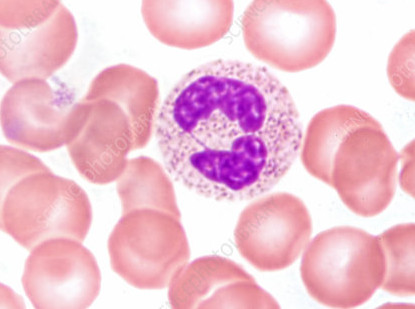


--- Analyzing... ---
--- Labeled Result ---


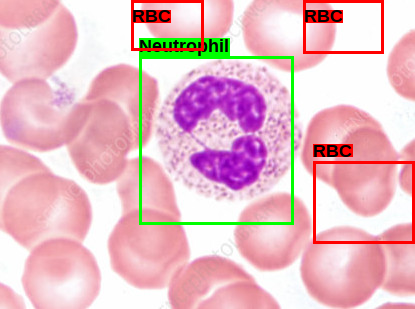

In [ ]:
# Example 2 Cell Analyst
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont
import requests
from io import BytesIO
from pydantic import BaseModel
from typing import List
from google.genai import types

# SETUP ----------------------

class BoundingBox(BaseModel):
    ymin: int
    xmin: int
    ymax: int
    xmax: int

class DetectedObject(BaseModel):
    label: str
    box: BoundingBox

class DetectionResult(BaseModel):
    objects: List[DetectedObject]

def draw_labels_on_image(image_input, detection_result: DetectionResult):
     annotated_image = image_input.copy()
     draw = PIL.ImageDraw.Draw(annotated_image)
     width, height = annotated_image.size

     try:
         font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf", 18)
     except IOError:
         font = PIL.ImageFont.load_default()

     for obj in detection_result.objects:
         # CONVERT 0-1000 SCALE TO PIXELS
         # We divide by 1000.0 to get the percentage, then multiply by image dim
         y1 = (obj.box.ymin / 1000.0) * height
         x1 = (obj.box.xmin / 1000.0) * width
         y2 = (obj.box.ymax / 1000.0) * height
         x2 = (obj.box.xmax / 1000.0) * width

         # Colors
         color = "#00FF00" # Green
         if "nucleus" in obj.label.lower():
             color = "#FFFF00" # Yellow for Nucleus (High contrast)
         if "rbc" in obj.label.lower():
             color = "#FF0000" # Red for RBC

         # Draw Box
         draw.rectangle([x1, y1, x2, y2], outline=color, width=3)

         # Draw Label
         text = obj.label
         text_pos = (x1, y1 - 22)
         if text_pos[1] < 0: text_pos = (x1, y1 + 5)

         bbox = draw.textbbox(text_pos, text, font=font)
         draw.rectangle(bbox, fill=color)
         draw.text(text_pos, text, fill="black", font=font)

     return annotated_image

# EXECUTION --------------

# Load Image
url = "https://biologicslab.co/BIO1173/images/class_04/Neutrophil.jpg"
response = requests.get(url)
original_image = PIL.Image.open(BytesIO(response.content))

print("--- Original Image ---")
display(original_image)

# REFINED PROMPT ---------------
# Add Visual Descriptions to guide the agent's eyes
prompt = """
Analyze this microscopy image.
Detect the following objects:

1. **Neutrophil**: The entire central white blood cell (including the cytoplasm).
2. **RBC**: Identify 3 surrounding red blood cells (pink circles).

**FORMAT INSTRUCTIONS:**
- Return bounding boxes using the **0 to 1000 integer scale**.
- ymin=0 is top, ymax=1000 is bottom.
- xmin=0 is left, xmax=1000 is right.
"""

print("\n--- Analyzing... ---")

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[original_image, prompt],
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=DetectionResult
    )
)

try:
    detection_data = DetectionResult.model_validate_json(response.text)
    final_image = draw_labels_on_image(original_image, detection_data)
    print("--- Labeled Result ---")
    display(final_image)

except Exception as e:
    print(f"Error: {e}")
    print(response.text)

If the code is correct you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image04D.png)


### **Exercise 2: Cell Analysis**

In the cell below write the code to analyze a photomicrograph of a nerve cell that you can download from this URL: ("https://biologicslab.co/BIO1173/images/class_04/Neuron.jpg").

Detect these objects in the photomicrograph of the nerve cell:

1. **Nucleus**: The dark spot inside the central cell body.
2. **Axon**: The largest process leaving the cell body.
3. **Dendrites**: Identify 3 smaller processes leaving the cell body.

--- Original Image ---


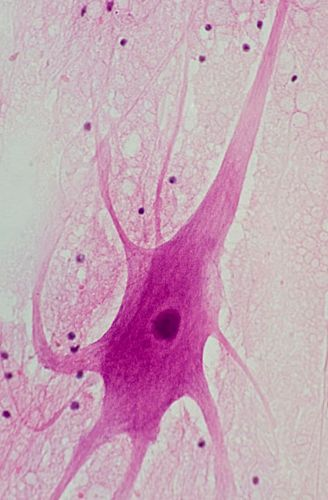


--- Analyzing with Precision... ---
--- Labeled Result ---


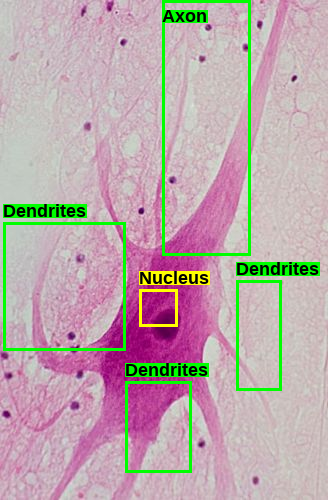

In [31]:
# Insert your code for Exercise 2 here

import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont
import requests
from io import BytesIO
from pydantic import BaseModel
from typing import List
from google.genai import types

# SETUP -------------

# We explicitly ask for 0-1000 scale integers now
class BoundingBox(BaseModel):
    ymin: int
    xmin: int
    ymax: int
    xmax: int

class DetectedObject(BaseModel):
    label: str
    box: BoundingBox

class DetectionResult(BaseModel):
    objects: List[DetectedObject]

def draw_labels_on_image(image_input, detection_result: DetectionResult):
     annotated_image = image_input.copy()
     draw = PIL.ImageDraw.Draw(annotated_image)
     width, height = annotated_image.size

     try:
         font = PIL.ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf", 18)
     except IOError:
         font = PIL.ImageFont.load_default()

     for obj in detection_result.objects:
         # CONVERT 0-1000 SCALE TO PIXELS
         # We divide by 1000.0 to get the percentage, then multiply by image dim
         y1 = (obj.box.ymin / 1000.0) * height
         x1 = (obj.box.xmin / 1000.0) * width
         y2 = (obj.box.ymax / 1000.0) * height
         x2 = (obj.box.xmax / 1000.0) * width

         # Colors
         color = "#00FF00" # Green
         if "nucleus" in obj.label.lower():
             color = "#FFFF00" # Yellow for Nucleus (High contrast)
         if "rbc" in obj.label.lower():
             color = "#FF0000" # Red for RBC

         # Draw Box
         draw.rectangle([x1, y1, x2, y2], outline=color, width=3)

         # Draw Label
         text = obj.label
         text_pos = (x1, y1 - 22)
         if text_pos[1] < 0: text_pos = (x1, y1 + 5)

         bbox = draw.textbbox(text_pos, text, font=font)
         draw.rectangle(bbox, fill=color)
         draw.text(text_pos, text, fill="black", font=font)

     return annotated_image

# EXECUTION ---------

# Load Image
url = "https://biologicslab.co/BIO1173/images/class_04/Neuron.jpg"
response = requests.get(url)
original_image = PIL.Image.open(BytesIO(response.content))

print("--- Original Image ---")
display(original_image)

# REFINED PROMPT ---------
# We add Visual Descriptions to guide the agent's eyes
prompt = """
Analyze this microscopy image.
Detect the following objects:

1. **Nucleus**: The dark spot inside the central cell body.
2. **Axon**: The largest process leaving the cell body.
3. **Dendrites**: Identify 3 smaller processes leaving the cell body.

**FORMAT INSTRUCTIONS:**
- Return bounding boxes using the **0 to 1000 integer scale**.
- ymin=0 is top, ymax=1000 is bottom.
- xmin=0 is left, xmax=1000 is right.
"""

print("\n--- Analyzing with Precision... ---")

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[original_image, prompt],
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=DetectionResult
    )
)

try:
    detection_data = DetectionResult.model_validate_json(response.text)
    final_image = draw_labels_on_image(original_image, detection_data)
    print("--- Labeled Result ---")
    display(final_image)

except Exception as e:
    print(f"Error: {e}")
    print(response.text)

If the code is correct you should see something similar to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image05D.png )


## **Part 3: The Clinical Tool Agent (Function Calling)**


### **Concept: Giving the Agent a "Tool Belt"**

While Large Language Models (LLMs) are incredibly smart at language, they are notoriously unreliable at precise mathematics or real-time data retrieval—they "hallucinate" numbers. **Function Calling** (or "Tool Use") solves this by allowing the agent to stop and say: *"I don't know the math, but I have a Python function that does."*

In this scenario, the agent acts as the **Brain**, and the Python function acts as the **Calculator**.

### Why Function Calling is Vital in Medicine
Precision is non-negotiable in clinical settings. You cannot rely on an LLM to "guess" a drug dosage based on body weight.
* **Safe Calculations:** The agent identifies the user's intent, extracts the variables (like weight or age), and passes them to a hard-coded, verified Python function.
* **Database Access:** An agent can use a tool to look up the most recent drug-drug interaction data from a trusted medical database.
* **Standardization:** It ensures that every student or clinician using the tool gets the same mathematical result every time.





### Example 3: BMI Calculator Tool

We define a Python function for BMI, and the Agent decides when to use it.


In [32]:
# Example 3:

# 1. Define the tool (Python Function)
def calculate_bmi(weight_kg: float, height_m: float) -> float:
    """Calculates Body Mass Index (BMI)."""
    return weight_kg / (height_m ** 2)

# 2. Create the Agent with the tool
# We pass the function to the 'tools' parameter
response = client.models.generate_content(
    model=MODEL_ID,
    contents="My patient is 1.75 meters tall and weighs 70 kg. What is their BMI and is it healthy?",
    config=types.GenerateContentConfig(
        tools=[calculate_bmi] # Give the agent the tool
    )
)

# 3. Print the result
# The agent calls the tool automatically behind the scenes in the SDK
print(response.text)

The patient's BMI is 22.86. A BMI between 18.5 and 24.9 is considered a healthy weight. So, the patient has a healthy BMI.



If the code is correct, you should see something _similar_ to the following output:

```text
The patient's BMI is 22.86. A BMI between 18.5 and 24.9 is considered a healthy weight. So, the patient has a healthy BMI.

```

### **Exercise 3: Kidney Function Tool (Creatinine Clearance)**


In the cell below, write the code to create a kidney function tool that can compute creatinine clearance. Then let the Agent use the tool for its analysis of this prompt:

```python
# 2. Create the Agent with the tool
# We pass the function to the 'tools' parameter in the config
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate the creatinine clearance for a 60-year-old male patient weighing 72kg with a serum creatinine of 1.2 mg/dL.",
    config=types.GenerateContentConfig(
        tools=[calculate_creatinine_clearance]
    )
)
```

**Code Hints:**

Here is the code for genrating the tool:

```python
def calculate_creatinine_clearance(age: int, weight_kg: float, serum_creatinine: float) -> float:
    """
    Calculates Creatinine Clearance (CrCl) using the Cockcroft-Gault formula.
    Formula: ((140 - age) * weight_kg) / (72 * serum_creatinine)
    """
    numerator = (140 - age) * weight_kg
    denominator = 72 * serum_creatinine
    return numerator / denominator
```

Task: Copy the code above. Replace the BMI tool with a tool to estimate Creatinine Clearance (Cockcroft-Gault formula). Formula: ((140 - age) * weight_kg) / (72 * serum_creatinine) Prompt: "Calculate the creatinine clearance for a 60-year-old male patient weighing 72kg with a serum creatinine of 1.2 mg/dL."


In [33]:
# Insert your code for Exercise 3 here

from google.genai import types

# 1. Define the specific clinical tool (The Cockcroft-Gault Formula)
def calculate_creatinine_clearance(age: int, weight_kg: float, serum_creatinine: float) -> float:
    """
    Calculates Creatinine Clearance (CrCl) using the Cockcroft-Gault formula.
    Formula: ((140 - age) * weight_kg) / (72 * serum_creatinine)
    """
    numerator = (140 - age) * weight_kg
    denominator = 72 * serum_creatinine
    return numerator / denominator

# 2. Create the Agent with the tool
# We pass the function to the 'tools' parameter in the config
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Calculate the creatinine clearance for a 60-year-old male patient weighing 72kg with a serum creatinine of 1.2 mg/dL.",
    config=types.GenerateContentConfig(
        tools=[calculate_creatinine_clearance]
    )
)

# 3. Print the result
print("--- Clinical Agent Response ---")
print(response.text)

--- Clinical Agent Response ---
The creatinine clearance for the patient is 66.67 mL/min.


If the code is correct you should see something _similar_ to the following output:

```text
--- Clinical Agent Response ---
The creatinine clearance for the patient is 66.67 mL/min.
```

## **Part 4: The Research Agent (Grounding)**

### **Solving the "Hallucination" Problem**

Large Language Models (LLMs) are like extremely well-read students who sometimes misremember facts. Because they predict the "next most likely word," they can occasionally invent a convincing-sounding but entirely fake citation or drug side effect. This is called **hallucination**.

**Grounding** is the process of anchoring an agent’s responses to a "Source of Truth"—in this case, the live internet via **Google Search**. Instead of relying solely on its internal training data, the agent becomes a researcher: it searches for information, reads the top results, and cites its sources.

#### **Why Grounding is Essential for Biology & Medicine**
In a field where information updates daily (e.g., new COVID-19 variants or FDA drug approvals), an ungrounded model is stuck in the past.
* **Real-Time Data:** Fetch the latest clinical trial results from 2024 or 2025.
* **Citation & Trust:** Medical students need to see *where* a fact came from (e.g., Mayo Clinic, CDC, or a Nature article).
* **Fact-Checking:** If an agent makes a claim about a rare genetic mutation, it can perform a search to verify that the mutation actually exists in the literature.

#### **Python Implementation:** The Grounded Medical Researcher
In this code, we enable the `Google Search` tool. This allows the agent to generate search queries and read web snippets before answering.


### Example 4: Grounded Medical Researcher

For Example 4, we will ask the "Grounded Medical Reseracher" to find current information about the most recent treatments for Alzheimer's disease. To guard against hallucinations, we also ask the agent to cite its sources.


In [34]:
# Example 4: Grounded Medical Researcher

from IPython.display import Markdown
from google import genai
from google.genai import types

# 1. Define the Google Search tool correctly using the types module
# We use the Tool class to wrap the GoogleSearch capability
search_tool = types.Tool(
    google_search=types.GoogleSearch()
)

prompt = """
What are the most recent (2024-2025) FDA-approved treatments for Alzheimer's disease?
Please provide the drug names and their primary mechanism of action.
Cite your sources with URLs.
"""

# 2. Pass the tool inside 'GenerateContentConfig'
# This tells the model it is allowed to use Google Search if it needs to
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[search_tool]
    )
)

# Render the response with clickable links
Markdown(response.text)

The most recent FDA-approved treatments for Alzheimer's disease in 2024-2025 are:

*   **Kisunla** (donanemab-azbt) Injection (Approved July 2, 2024): This treatment is for adults with Alzheimer's disease. Kisunla is a monoclonal antibody that targets and removes amyloid plaques in the brain. It should be initiated in patients with mild cognitive impairment or mild dementia. It is administered as an intravenous infusion every four weeks. ([2], [7])
*   **Leqembi** (lecanemab-irmb) (Approved January 26, 2025 Maintenance Dose): Leqembi is a monoclonal antibody designed to target and reduce amyloid plaques in the brain. It binds to soluble amyloid-beta protofibrils, aiming to prevent the formation of amyloid plaques and promote their clearance from the brain. Lecanemab is administered intravenously every 2 weeks, which may be extended to every 4 weeks after 18 months of treatment. ([1], [3], [4], [7], [10], [15])


If the code is correct you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image06D.png)

Since we "grounded" out agent, we can be more confident in the accuracy of the results compared to simply asking the LLM directly for this information.

### **Exercise 4: Malaria Treatment Search**

For **Exercise 4**, copy the code above and change the prompt to research "Approved Malaria vaccines and their efficacy rates in 2025".

Make sure the agent searches for the most recent R21/Matrix-M data.

In [35]:
# Insert your code for Exercise 4 here

from IPython.display import Markdown
from google import genai
from google.genai import types

# 1. Define the Google Search tool correctly using the types module
# We use the Tool class to wrap the GoogleSearch capability
search_tool = types.Tool(
    google_search=types.GoogleSearch()
)

prompt = """
"Approved Malaria vaccines and their efficacy rates in 2025? Search recent R21/Matrix-M data."
Please provide the drug names and their primary mechanism of action.
Cite your sources with URLs.
"""

# 2. Pass the tool inside 'GenerateContentConfig'
# This tells the model it is allowed to use Google Search if it needs to
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[search_tool]
    )
)

# Render the response with clickable links
Markdown(response.text)

As of January 19, 2026, there are two approved malaria vaccines:

*   **RTS,S/AS01 (Mosquirix):** In a multicountry Phase 3 study, the protection conferred by RTS,S/AS01 against uncomplicated malaria was 55.8% in children 5 to 17 months of age during the 14 months of follow-up after the first dose. When subclinical infections were cleared by coadministration of seasonal malaria chemoprevention (SMC), the protective efficacy of the combination was 62.8% against clinical malaria, 70.5% against severe malaria, and 72.9% against death from malaria.
    *   **Primary Mechanism of Action:** RTS,S consists of the circumsporozoite protein (CSP) of the sporozoite stage of *Plasmodium falciparum* antigen on a Hepatitis B virus surface antigen (HbsAg) backbone and is given as a course of 3 monthly doses with a booster 12 months after the third dose. The vaccine aims to target sporozoites and prevent infection. Sporozoites might be susceptible to antibody recognition in the skin after inoculation and in the blood before reaching the liver. The vaccine triggers the production of antibodies that block sporozoites from infecting liver cells. Those that do manage to break through are targeted by T cells, which are also activated by the vaccines.
*   **R21/Matrix-M:** The 12-month vaccine efficacy of R21/Matrix-M against uncomplicated malaria was 78% in children 5 to 17 months old from a multicountry Phase 3 study. Good efficacy (66%) was noted during the 12 months following the first 3 doses, with a fourth dose a year after the third maintaining efficacy. In areas with high seasonal malaria transmission, efficacy over 12 months was 75%, and 68% in areas with more perennial transmission using standard age-based administration.
    *   **Primary Mechanism of Action:** The R21/Matrix-M vaccine also targets the circumsporozoite protein (CSP) found on the surface of sporozoites. It utilizes a higher antigen-to-carrier ratio and the Matrix-M adjuvant to enhance immunogenicity. The vaccine triggers the production of antibodies that block sporozoites from infecting liver cells. Those that do manage to break through are targeted by T cells, which are also activated by the vaccines. Matrix-M induces early activation of innate immune cells at the injection site and in the draining lymph nodes, which translates into an improved magnitude and quality of the antibody response to the antigen and the induction of a Th1-dominant immune response.

**Cite your sources:**

*   Two vaccines, one target: How the RTS,S and R21 malaria vaccines work: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFQRk9avNCJYIRDBLxaXMFWv3EDyb\_cmWvoXsL0mNkTVHZeQWL-L\_MPPGgPXSHuSvN6NzwsDsR4wK3bNkLXM7C30vs6h8nkSbbF\_eOAbpU4h7g0hddS67pWZpaPSKLL1a-xXuZVIpg4g5\_B4SC2swLT6VeNhznCm0dTBLZ9C8N\_gC7O7b1fECYE3Laf3CRZqMX03frm\_hcpsCsBeg==](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFQRk9avNCJYIRDBLxaXMFWv3EDyb_cmWvoXsL0mNkTVHZeQWL-L_MPPGgPXSHuSvN6NzwsDsR4wK3bNkLXM7C30vs6h8nkSbbF_eOAbpU4h7g0hddS67pWZpaPSKLL1a-xXuZVIpg4g5_B4SC2swLT6VeNhznCm0dTBLZ9C8N_gC7O7b1fECYE3Laf3CRZqMX03frm_hcpsCsBeg==)
*   R21/Matrix-M™ malaria vaccine: a new tool to achieve WHO`s goal to eliminate malaria in 30 countries by 2030 ?: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG15WgQSJSowfAotQHIFJ-ytN5JU8jZGUXSBueLoF9XwVo9g1rAOGG3zaw2cIRfjJ8exsSdmT-GepU5hmP-syaNQGaflB6SSiWIKe95ssdZSDbMbPYbDTTM2Q-Vu5wG1iPohvmbvMpePXnxLMgg94fjrhRAmcWEQVvaSkTehFK3u6vvvr6603AZyI0XlLsGH0s6UMTpOzCj6ZAVpSg5hJ5R4zub5zrzKPFcAO\_fuoCtvmTSJdgBaUyEWAFS87H3DtK8\_KM4BlyQ3EaeDuvm09i0LBhyXwuKwQ==](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQG15WgQSJSowfAotQHIFJ-ytN5JU8jZGUXSBueLoF9XwVo9g1rAOGG3zaw2cIRfjJ8exsSdmT-GepU5hmP-syaNQGaflB6SSiWIKe95ssdZSDbMbPYbDTTM2Q-Vu5wG1iPohvmbvMpePXnxLMgg94fjrhRAmcWEQVvaSkTehFK3u6vvvr6603AZyI0XlLsGH0s6UMTpOzCj6ZAVpSg5hJ5R4zub5zrzKPFcAO_fuoCtvmTSJdgBaUyEWAFS87H3DtK8_KM4BlyQ3EaeDuvm09i0LBhyXwuKwQ==)
*   Roll out and prospects of the malaria vaccine R21/Matrix-M: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHJApBqqW\_FIpcP5rStZ2TrEOTWWX6ff3eUNZ-wpWnn15zAcm\_zbOjXMnxu3rfEYneThh\_t6GzNDAdP237JnRJz6dzGElHZew3kXOfhATCEzFcJlVAq\_w-e3RKKvtkhmljbcDqIXAGlApiewCkZX\_JWK0qA6CYeHGtOaRN3S-RFuO6lI8162owEjA==](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHJApBqqW_FIpcP5rStZ2TrEOTWWX6ff3eUNZ-wpWnn15zAcm_zbOjXMnxu3rfEYneThh_t6GzNDAdP237JnRJz6dzGElHZew3kXOfhATCEzFcJlVAq_w-e3RKKvtkhmljbcDqIXAGlApiewCkZX_JWK0qA6CYeHGtOaRN3S-RFuO6lI8162owEjA==)
*   The Matrix-M™ adjuvant: A critical component of vaccines for the 21st century: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFRN9xdc7n8BuhVJoX3s8ZvdzGUXo1k7UwvvmaTcsrbpbxRFqVA4O4bLUYSYWEU8FPg9pfjBgMa98JdbP1hubtN0aGTbnYdkXkNEiWQ_GIdHJdRLWNRiMeskPWhDVOdnNM4HGMhOutxKboPjARr](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFRN9xdc7n8BuhVJoX3s8ZvdzGUXo1k7UwvvmaTcsrbpbxRFqVA4O4bLUYSYWEU8FPg9pfjBgMa98JdbP1hubtN0aGTbnYdkXkNEiWQ_GIdHJdRLWNRiMeskPWhDVOdnNM4HGMhOutxKboPjARr)
*   WHO recommends R21/Matrix-M vaccine for malaria prevention in updated advice on immunization: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE9VvEu2uF-paaZCSGn5MhZThRKUEEdIvrgyQ2Wk3v8buGEjlyS7qIYyPOZxZT1Du6gpn3-sMb7gUtkDn8H7JawvpjxotTuFxN7HOuF7jwHWiOczwN8BzYd-7AJsj97pEKRnPbdODaa8shhSiNXwxG7cUpsbXb\_FOeooLHCw\_hq-jZTfKwdOi9VJ2XTYSuuzaUGxIuk8XyQ-XxasiGG7nN6BKhDlHMnGisuGCMc\_x\_wCl\_JhOQ8Jkud1zhUQIzqbBoU](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE9VvEu2uF-paaZCSGn5MhZThRKUEEdIvrgyQ2Wk3v8buGEjlyS7qIYyPOZxZT1Du6gpn3-sMb7gUtkDn8H7JawvpjxotTuFxN7HOuF7jwHWiOczwN8BzYd-7AJsj97pEKRnPbdODaa8shhSiNXwxG7cUpsbXb_FOeooLHCw_hq-jZTfKwdOi9VJ2XTYSuuzaUGxIuk8XyQ-XxasiGG7nN6BKhDlHMnGisuGCMc_x_wCl_JhOQ8Jkud1zhUQIzqbBoU)
*   Oxford R21/Matrix-M™ malaria vaccine receives WHO recommendation for use paving the way for global roll-out: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEVzHrr35c5dnMSQuE1cnDXyCD4bxNzQdO8yYLhd1TltjLxuOKsaxa1s29Cp-y\_ZNa9JOLn0dpHdwbrGiFFuS7KrWYa-OXRXOLEBDNDWIMSYwa2OFHXFDxueuIajxRpPZK7tiriMN1Vz0rS8zwPuMLZ7saAuTeNUXVSxJ9lldFxGhTslUGOFkzh\_42SephYBOtAgMJi2QEvNHsjZCL7-wZh1pV8Qmpa1pYZv6nazYYau\_lQ6cw=](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEVzHrr35c5dnMSQuE1cnDXyCD4bxNzQdO8yYLhd1TltjLxuOKsaxa1s29Cp-y_ZNa9JOLn0dpHdwbrGiFFuS7KrWYa-OXRXOLEBDNDWIMSYwa2OFHXFDxueuIajxRpPZK7tiriMN1Vz0rS8zwPuMLZ7saAuTeNUXVSxJ9lldFxGhTslUGOFkzh_42SephYBOtAgMJi2QEvNHsjZCL7-wZh1pV8Qmpa1pYZv6nazYYau_lQ6cw=)
*   Breaking the malaria barrier: the WHO-approved R21/Matrix-M vaccine and its global impact – an editorial: [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGl4\_bWi2VszLiGabPHd68oppDAWrGgyxmTFjqgs78kag4Ng73K2bJtmpYaG-dnoMrQeGcv2fitaiEWXC22Iss0Z0ByZ-nOqfem3XpLVZIuU6vPS5AJe\_bjwdfBCWxBlHzmf5ssTOgMR4AbDyTR](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGl4_bWi2VszLiGabPHd68oppDAWrGgyxmTFjqgs78kag4Ng73K2bJtmpYaG-dnoMrQeGcv2fitaiEWXC22Iss0Z0ByZ-nOqfem3XpLVZIuU6vPS5AJe_bjwdfBCWxBlHzmf5ssTOgMR4AbDyTR)


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image07D.png)



## **Part 5: The Triage Agent (Structured Data Extraction)**


### **Turning Messy Notes into Clean Data**

In a hospital setting, the most valuable data is often trapped in **unstructured text**—handwritten scrawls, rushed "doctor's notes," or recorded patient intake conversations. While humans can read these, computers cannot easily perform statistics or trigger alerts on them.

A **Triage Agent** acts as a sophisticated parser. It uses **Named Entity Recognition (NER)** to scan a block of text, identify clinical entities (like symptoms, medications, or vitals), and organize them into a **JSON (JavaScript Object Notation)** format. JSON is the standard language for modern databases and web applications.

### Why Structured Data is a Medical Necessity
* **Database Integration:** You can't plot a graph of a patient's blood pressure over time if the values are buried in paragraphs of text.
* **Emergency Prioritization:** An agent can instantly extract "Chest Pain" and "Shortness of Breath" from a note and flag that patient as a "Level 1" priority in the ER queue.
* **Error Reduction:** By extracting specific dosages and frequencies into structured fields, agents help prevent "transcription errors" that occur during manual data entry.



### Example 5: Triage Agent

This example demostrates how to convert a messy clinical note into a clean data. We used an optical character reader (OCR) could be used to scan the doctor's note and stored it on the course file server at this URL: "https://biologicslab.co/BIO1173/images/class_04/DoctorNote.png"


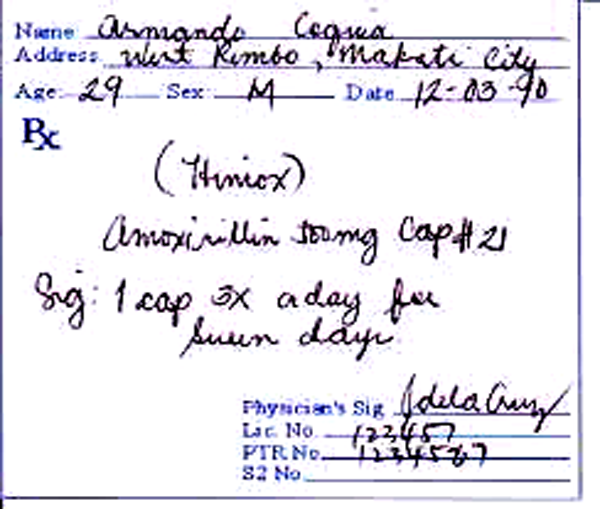

Successfully Extracted Structured Data:
{
    "patient_name": "Armando Cegua",
    "patient_age": 29,
    "patient_sex": "M",
    "address": "West Rimbo, Makati City",
    "date": "12-03-90",
    "prescription_medication": "Amoxicillin",
    "dosage": "500mg Cap #21",
    "sig": "1 cap 3X a day for seven days",
    "physician_signature": "Idelacruz",
    "license_numbers": {
        "Lic No": "123457",
        "PTR No": "1234577",
        "S2 No": null
    }
}


In [36]:
# Example 5: The Medical JSON Generator (Modified for Image Input)

import json
from IPython.display import Markdown
from PIL import Image
import requests
from io import BytesIO

# Load the doctor's note image from URL
image_url = "https://biologicslab.co/BIO1173/images/class_04/DoctorNote.png"

# Download the image
response_img = requests.get(image_url)
img = Image.open(BytesIO(response_img.content))

# Display the image to verify it loaded correctly
display(img)

# We ask for a "JSON schema" - a specific structure the agent must follow
prompt = """
Analyze the doctor's note in this image and extract the data into a JSON format.

The JSON must include these keys:
- 'patient_name': string
- 'patient_age': int
- 'patient_sex': string
- 'address': string
- 'date': string
- 'prescription_medication': string
- 'dosage': string
- 'sig': string (instructions)
- 'physician_signature': string
- 'license_numbers': object (Lic No, PTR No, S2 No)

Return ONLY the raw JSON.
"""

# Send both the image and prompt to the model
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, img]
)

# Parse the string response into a real Python dictionary
try:
    # Removing potential markdown backticks if the agent included them
    clean_json = response.text.replace("```json", "").replace("```", "").strip()
    data = json.loads(clean_json)

    print("Successfully Extracted Structured Data:")
    print(json.dumps(data, indent=4))

except Exception as e:
    print(f"Error parsing JSON: {e}")
    print(f"Raw response: {response.text}")


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image08D.png)



### **Exercise 5: Medication Extraction**

Copy the code above and change the image to "DoctorNote2.png".

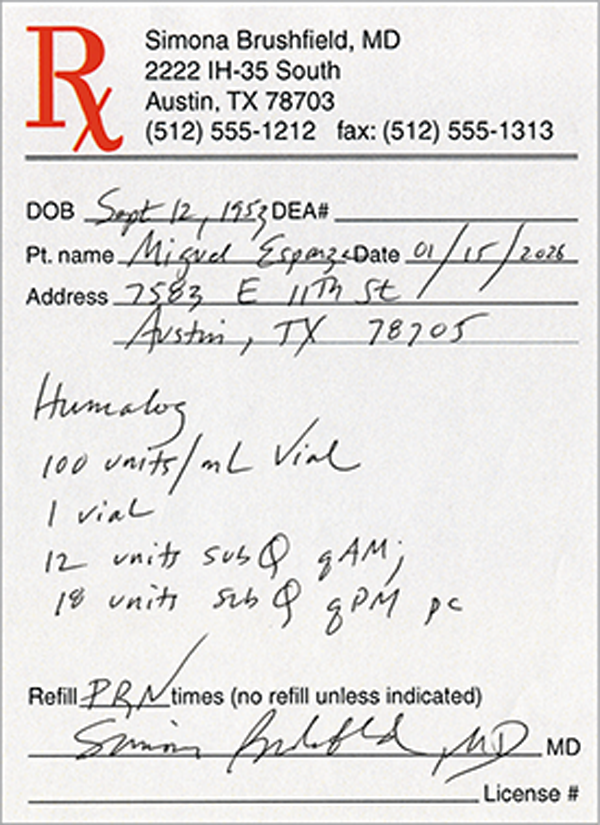

Successfully Extracted Structured Data:
{
    "patient_name": "Miguel Esparza",
    "patient_age": null,
    "patient_sex": null,
    "address": "7583 E 11th St\nAustin, TX 78705",
    "date": "01/15/2026",
    "prescription_medication": "Humalog",
    "dosage": "100 units/mL Vial\n1 vial",
    "sig": "12 units subQ qAM;\n18 units subQ qPM pc",
    "physician_signature": "Simona Brushfield, MD",
    "license_numbers": {}
}


In [37]:
# Insert your code for Exericse 5 here

import json
from IPython.display import Markdown
from PIL import Image
import requests
from io import BytesIO

# Load the doctor's note image from URL
image_url = "https://biologicslab.co/BIO1173/images/class_04/DoctorNote2.png"

# Download the image
response_img = requests.get(image_url)
img = Image.open(BytesIO(response_img.content))

# Display the image to verify it loaded correctly
display(img)

# We ask for a "JSON schema" - a specific structure the agent must follow
prompt = """
Analyze the doctor's note in this image and extract the data into a JSON format.

The JSON must include these keys:
- 'patient_name': string
- 'patient_age': int
- 'patient_sex': string
- 'address': string
- 'date': string
- 'prescription_medication': string
- 'dosage': string
- 'sig': string (instructions)
- 'physician_signature': string
- 'license_numbers': object (Lic No, PTR No, S2 No)

Return ONLY the raw JSON.
"""

# Send both the image and prompt to the model
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, img]
)

# Parse the string response into a real Python dictionary
try:
    # Removing potential markdown backticks if the agent included them
    clean_json = response.text.replace("```json", "").replace("```", "").strip()
    data = json.loads(clean_json)

    print("Successfully Extracted Structured Data:")
    print(json.dumps(data, indent=4))

except Exception as e:
    print(f"Error parsing JSON: {e}")
    print(f"Raw response: {response.text}")


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image09D.png)



## **Part 6: Patient Education Assistant**

A Doctor can use an AI agent to create a `Patient Assistant` to help her communicate with her patients with different levels of health literacy.

### Example 6: Patient Explainer

The code in the cell below creates an Patient Assistant that generates a small handout explaining "Hypertension" to a patient with **low** health literacy.

In [39]:
# Example 6: Patient Explainer

prompt = """
You are a helpful medical assistant.
Create a simple, 3-bullet point handout explaining 'Hypertension' (High Blood Pressure) to a patient with low health literacy.
Focus on:
1. What it is.
2. Why it is dangerous.
3. One lifestyle change to fix it.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# Render the response with clickable links
Markdown(response.text)

Okay, here's a simple handout explaining Hypertension to a patient with low health literacy:

**Hypertension: Understanding High Blood Pressure**

*   **What is it?** Think of your blood pushing too hard against the walls of your blood vessels. This is called high blood pressure, or hypertension.

*   **Why is it dangerous?** Over time, this hard pushing can hurt your heart, brain, and kidneys. This can lead to heart attacks, strokes, and kidney problems.

*   **One way to help:** Try eating less salt! Too much salt makes your blood pressure go up. Check food labels and try to use less salt when you cook.


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image10D.png)

### **Exercise 6: Patient Explainer**

The code in the cell below creates an Patient Assistant that generates a small handout explaining "Hypertension" to a patient with **high** health literacy.

In [40]:
# Insert your code for Exercise 6 here

prompt = """
You are a helpful medical assistant.
Create a simple, 3-bullet point handout explaining 'Hypertension' (High Blood Pressure) to a patient with high health literacy.
Focus on:
1. What it is.
2. Why it is dangerous.
3. One lifestyle change to fix it.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# Render the response with clickable links
Markdown(response.text)

Okay, here's a simple handout explaining hypertension, tailored for a patient with good health literacy:

**Hypertension: Understanding High Blood Pressure**

*   **What it is:** Hypertension, or high blood pressure, occurs when the force of your blood against your artery walls is consistently too high (typically ≥130/80 mmHg). This means your heart is working harder to pump blood, and your arteries are under increased strain.

*   **Why it's Dangerous:** Prolonged hypertension silently damages vital organs. It significantly increases your risk of serious health problems, including heart attack, stroke, heart failure, kidney disease, vision loss, and sexual dysfunction.

*   **One Lifestyle Change:** Adopt a Dietary Approaches to Stop Hypertension (DASH) diet. This focuses on fruits, vegetables, whole grains, lean protein, and low-fat dairy, while limiting saturated fat, cholesterol, and sodium. This simple change can dramatically lower your blood pressure and improve overall health.


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image11D.png)

## **Part 7: Chain of Thought (The "Reasoning" Engine)**

### **"Think Step-by-Step"**

Standard AI models often provide a final answer immediately. However, for high-stakes biology and medicine, we need to see the **why** and the **how**. **Chain of Thought (CoT)** is a reasoning technique where the agent is forced to decompose a complex problem into intermediate, logical steps before arriving at a conclusion.

Think of it as "showing your work" on a math test. In medicine, this is the digital equivalent of a **Differential Diagnosis (DDx)**.

### **Why CoT is Critical for Differential Diagnosis**

Differential diagnosis is the systematic process of distinguishing between two or more conditions that share similar symptoms.
1.  **Evidence Summarization:** The agent first identifies pertinent "positives" (symptoms present) and "negatives" (symptoms absent).
2.  **Hypothesis Generation:** It creates a broad list of possible conditions using frameworks like **VINDICATE** (Vascular, Infectious, Neoplastic, etc.).
3.  **Iterative Refinement:** It uses logical "if-then" reasoning to rule out conditions based on specific data (e.g., "If the patient has no fever, an infectious cause is less likely").
4.  **Transparency:** If the agent makes a mistake, you can trace the "Chain" to see exactly where the logic failed.

### Example 7: The Differential Diagnosis Agent

The code in the cell below shows how to create and use a differential diagnosis agent.

In [41]:
# Example 7: The Differential Diagnosis Agent
from IPython.display import Markdown

# A complex patient presentation
case_study = """
Patient: 58yo Female.
Chief Complaint: Sudden onset shortness of breath and sharp chest pain that worsens with deep breaths.
History: Recent 12-hour flight from overseas. No history of heart disease.
Vitals: HR 115 (Tachycardia), BP 110/70, O2 Sats 91% (Hypoxia).
Exam: Right calf is swollen and tender to touch.
"""

# We explicitly ask the agent to use 'Chain of Thought'
prompt = f"""
You are a Senior Diagnostic Resident. Analyze this case using Chain of Thought reasoning.
Case: {case_study}

Follow these steps:
1. Summarize key clinical findings.
2. List 3 potential differential diagnoses (DDx) using the VINDICATE framework.
3. Evaluate each DDx based on the evidence (Rule-in/Rule-out).
4. Recommend the single most high-yield next diagnostic test.

Let's think step by step.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)


Okay, let's break down this case step-by-step using the Chain of Thought method, focusing on efficiency and accuracy as a senior diagnostic resident.

**1. Summary of Key Clinical Findings:**

*   **Patient:** 58-year-old female
*   **Chief Complaint:** Sudden onset shortness of breath and sharp, pleuritic chest pain (worsens with deep breaths)
*   **History:** Recent long-haul flight (12 hours), No known cardiac history
*   **Vitals:** Tachycardia (HR 115), Hypoxia (O2 91%), BP stable (110/70)
*   **Exam:** Right calf swelling and tenderness

**2. Differential Diagnosis (VINDICATE):**

VINDICATE is a helpful mnemonic for generating a broad differential. Let's focus on the most likely candidates given the presentation:

*   **Vascular:** Pulmonary Embolism (PE)
*   **Infectious:** Pneumonia (less likely given sudden onset and pleuritic pain)
*   **Trauma:** Pneumothorax (less likely given the location of the pain/symptoms)

**3. Evaluation of Each DDx:**

*   **Pulmonary Embolism (PE):**
    *   **Rule-In:**
        *   Sudden onset dyspnea and pleuritic chest pain are classic symptoms.
        *   Recent long-haul flight is a significant risk factor for DVT and subsequent PE.
        *   Tachycardia and Hypoxia support this diagnosis.
        *   Right calf swelling and tenderness strongly suggest Deep Vein Thrombosis (DVT), the primary source of most PEs.
    *   **Rule-Out:**
        *   Lack of known cardiac history makes alternative cardiac causes slightly less likely, but doesn't rule them out entirely.

*   **Pneumonia:**
    *   **Rule-In:**
        *   Shortness of breath can be a symptom of pneumonia.
        *   Chest pain can be present with pneumonia.
    *   **Rule-Out:**
        *   Onset is more gradual, not sudden.
        *   Pleuritic chest pain isn't typical, usually a dull or aching pain
        *   No fever or productive cough are mentioned.
        *   Unlikely that pneumonia would manifest with calf swelling.
        *   Less likely overall than PE

*   **Pneumothorax:**
    *   **Rule-In:**
        *   Sudden onset chest pain and shortness of breath are symptoms of pneumothorax.
    *   **Rule-Out:**
        *   Less common to find calf swelling.
        *   Risk factors less present compared to PE.

**4. Recommended Next Diagnostic Test:**

Given the high probability of PE based on the clinical picture (Wells score would likely be high with leg swelling, tachycardia, recent travel, and likely no other explanation), the next step should be:

*   **CTA Chest (CT Angiogram of the Chest) with DVT Protocol:** This is the most appropriate test because:
    *   It directly visualizes pulmonary arteries to detect emboli.
    *   It assesses the lung parenchyma for other possible causes of symptoms.
    *   The DVT protocol images the veins of the legs to confirm or exclude DVT, which would strongly support the PE diagnosis and guide anticoagulation management.
    *   Faster than performing separate testing (i.e. VQ scan, Ultrasound).

**Therefore, the highest yield next diagnostic test is CTA Chest with DVT Protocol.**


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image12D.png)

### **Exercise 7A: Diagnostic Reasoning**

In the cell below create a Diagnostic Reasoning agent for a `Senior Pediatric Resident`.

Use the following as your case study:

```Python
# Case study
case_study = """
Patient: 7yo Male.
Chief Complaint: Mother reports extreme thirst (polydipsia) and frequent urination (polyuria) for 2 weeks.
History: Significant weight loss despite increased appetite. Today, the child is lethargic and breathing deeply/rapidly.
Vitals: HR 125, BP 90/60, Temp 98.6F.
Exam: "Fruity" odor on breath. Abdominal tenderness present.
"""

```


In [42]:
# Insert your code for Exercise 7A here

from IPython.display import Markdown

# Case study
case_study = """
Patient: 7yo Male.
Chief Complaint: Mother reports extreme thirst (polydipsia) and frequent urination (polyuria) for 2 weeks.
History: Significant weight loss despite increased appetite. Today, the child is lethargic and breathing deeply/rapidly.
Vitals: HR 125, BP 90/60, Temp 98.6F.
Exam: "Fruity" odor on breath. Abdominal tenderness present.
"""

# We use the same 'Chain of Thought' instruction
prompt = f"""
You are a Senior Pediatric Resident. Analyze this case using Chain of Thought reasoning.
Case: {case_study}

Follow these steps:
1. Summarize key clinical findings.
2. List 3 potential differential diagnoses (DDx) using the VINDICATE framework.
3. Evaluate each DDx based on the evidence (Rule-in/Rule-out).
4. Recommend the single most high-yield next diagnostic test (e.g., specific lab panel).

Let's think step by step.
"""

# Execute the agent
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# Display the reasoning chain
Markdown(response.text)


Okay, let's approach this case systematically.

**1. Summary of Key Clinical Findings:**

*   **Age:** 7 years old
*   **Sex:** Male
*   **Chief Complaint:** Polydipsia and polyuria (2 weeks duration)
*   **History:**
    *   Significant weight loss despite increased appetite
    *   Lethargy
    *   Deep and rapid breathing
*   **Vitals:**
    *   Tachycardia (HR 125)
    *   Hypotension (BP 90/60)
    *   Normal Temperature (98.6F)
*   **Exam:**
    *   "Fruity" breath odor
    *   Abdominal tenderness

**2. Differential Diagnoses (VINDICATE Framework):**

Let's consider potential causes using the VINDICATE mnemonic. Given the acute presentation and prominent polyuria/polydipsia, I'll focus on causes that can present relatively quickly in a previously healthy child.

*   **Vascular:** While less likely given the lack of focal neurological signs, consider *cerebral edema* as a complication of a metabolic derangement. This could contribute to the lethargy.
*   **Infection:** *Urinary Tract Infection (UTI) with pyelonephritis* could present with abdominal pain and could, in rare cases, lead to polyuria through various mechanisms, although it doesn't fully explain the other findings. *Sepsis* should also be considered, as it can lead to altered mental status, tachycardia, and hypotension.
*   **Metabolic:** *Diabetic Ketoacidosis (DKA)* is a very strong contender, given the classic symptoms of polydipsia, polyuria, weight loss, increased appetite (initially), fruity breath odor, abdominal pain, Kussmaul breathing (deep and rapid), lethargy, tachycardia, and hypotension.

**3. Evaluation of Differential Diagnoses:**

*   **Diabetic Ketoacidosis (DKA):**
    *   **Rule-In:** Polydipsia, polyuria, weight loss despite increased appetite, fruity breath odor, abdominal tenderness, Kussmaul breathing, lethargy, tachycardia, and hypotension are all highly suggestive of DKA.
    *   **Rule-Out:** Nothing specific points *away* from DKA in the presented information.

*   **Urinary Tract Infection (UTI) with Pyelonephritis:**
    *   **Rule-In:** Abdominal tenderness might be consistent. UTI can, rarely, cause polyuria/polydipsia via kidney dysfunction.
    *   **Rule-Out:** Does not explain the fruity breath odor, weight loss despite increased appetite, Kussmaul breathing, or overall severity of illness as well as DKA. While a UTI could present with tachycardia, the other vital sign abnormalities (hypotension) and lethargy are less typical.

*   **Sepsis:**
    *   **Rule-In:** Tachycardia, hypotension, lethargy, abdominal tenderness.
    *   **Rule-Out:** Does not explain the polydipsia, polyuria, weight loss, increased appetite, or fruity breath odor as directly. Sepsis can, however, induce hyperglycemia and complicate the picture. A source of infection is not yet apparent from the history.

*   **Cerebral Edema:**
    *   **Rule-In:** Lethargy is consistent. It is possible there are more subtle findings on exam that are not appreciated.
    *   **Rule-Out:** Does not explain any of the other symptoms or exam findings. This is also only applicable as a complication.

**4. Recommended Next Diagnostic Test:**

Given the constellation of symptoms, **a fingerstick blood glucose and a venous blood gas (VBG)** are the most high-yield next steps. The fingerstick will rapidly assess for hyperglycemia. The VBG will provide information about pH, bicarbonate, and partial pressure of carbon dioxide, which are essential for determining the severity of acidosis and guiding initial management of suspected DKA. Electrolytes should also be obtained as soon as possible.

While a urinalysis and urine culture would be important if a UTI was strongly suspected, the clinical picture is much more consistent with DKA, making the blood glucose and VBG the more critical initial tests.


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image13D.png)

### **Exercise 7B: Diagnostic Reasoning**

Task: Copy the code above. Change the symptoms variable to: "Patient is a 45-year-old female presenting with right upper quadrant abdominal pain that radiates to the shoulder, triggered after eating a fatty meal." Goal: See if the agent correctly identifies Cholecystitis (Gallstones) as a primary differential.

In [43]:
# Insert your code for Exercise 7B here

from IPython.display import Markdown

# Case study
case_study = """
 "Patient is a 45-year-old female presenting with right upper quadrant abdominal pain that radiates to the shoulder, triggered after eating a fatty meal."
"""

# We use the same 'Chain of Thought' instruction
prompt = f"""
You are a Senior Pediatric Resident. Analyze this case using Chain of Thought reasoning.
Case: {case_study}

Follow these steps:
1. Summarize key clinical findings.
2. List 3 potential differential diagnoses (DDx) using the VINDICATE framework.
3. Evaluate each DDx based on the evidence (Rule-in/Rule-out).
4. Recommend the single most high-yield next diagnostic test (e.g., specific lab panel).

Let's think step by step.
"""

# Execute the agent
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

# Display the reasoning chain
Markdown(response.text)


Okay, I'm ready. Here's my chain of thought analysis of the case:

**1. Summary of Key Clinical Findings:**

*   **Patient:** 45-year-old female
*   **Chief Complaint:** Right upper quadrant (RUQ) abdominal pain
*   **Pain Characteristics:** Radiates to the right shoulder, triggered by fatty meals.

**2. Differential Diagnoses (VINDICATE Framework):**

VINDICATE helps to systematically consider different categories of disease. I'll focus on the most likely possibilities given the RUQ pain and dietary association:

*   **Vascular:** *Hepatic Ischemia/Infarction* - While less common, we must consider vascular issues affecting the liver or gallbladder.
*   **Inflammatory/Infectious:** *Cholecystitis* (Inflammation of the gallbladder, most commonly due to gallstones)
*   **Mechanical/Obstructive:** *Cholelithiasis* (Gallstones)

**3. Evaluation of DDx (Rule-in/Rule-out):**

Let's evaluate each possibility based on the initial information:

*   **Hepatic Ischemia/Infarction:**
    *   *Rule-Out:* This is less likely than other causes, as it often presents with more acute and severe symptoms. The trigger by fatty meals is less typical. Often seen in patients with underlying cardiac disease, hypotension, or hypercoagulable states. We don't have any evidence to suggest these are present in this patient.
*   **Cholecystitis:**
    *   *Rule-In:* The RUQ pain radiating to the shoulder is a classic symptom of cholecystitis. The association with fatty meals, which stimulate gallbladder contraction, strongly supports this diagnosis. However, we don't know yet if it's acute or chronic.
*   **Cholelithiasis:**
    *   *Rule-In:* Gallstones themselves (cholelithiasis) can cause intermittent pain (biliary colic) when they obstruct the cystic duct. The RUQ pain triggered by fatty meals is consistent with this. However, cholelithiasis can *lead to* cholecystitis. So it could be this alone, or this with inflammation.

**4. Recommended Next Diagnostic Test:**

Given the high suspicion for gallbladder pathology, the most high-yield next diagnostic test is:

*   **Right Upper Quadrant Ultrasound (RUQ US):**

    *   *Rationale:* Ultrasound is non-invasive, relatively inexpensive, and highly sensitive for detecting gallstones (cholelithiasis). It can also show signs of gallbladder wall thickening, pericholecystic fluid, and a positive sonographic Murphy's sign (pain when the ultrasound probe is placed over the gallbladder), which are indicative of cholecystitis.
    *   *Why not other tests?*
        *   *Liver Function Tests (LFTs):* While helpful in evaluating liver function, they are not as specific for gallbladder disease. LFTs may be normal with uncomplicated cholelithiasis.
        *   *HIDA Scan:* This is more sensitive than ultrasound for acute cholecystitis, *but* it's more time-consuming, uses ionizing radiation, and is typically reserved for cases where the ultrasound is inconclusive but clinical suspicion remains high.

**In summary, my recommendation is to order a Right Upper Quadrant Ultrasound to evaluate for cholelithiasis and cholecystitis.**


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image14D.png)

## **Part 8: Agentic Search (The "Proactive" Researcher)**

### **Reactive vs. Proactive AI**

Most AI interactions are **reactive**: you ask a question, and the AI answers based on what it already knows. **Agentic Search** is **proactive**. When an agent encounters a "knowledge gap"—a piece of information it doesn't have or is unsure about—it doesn't guess. Instead, it pauses its reasoning, realizes it needs more data, and takes the initiative to search the web or a database to fill that gap.

In science, this is the difference between a student who says "I don't know" and a researcher who says "I don't know yet, let me find out."

### Why Proactive Search is Essential for Medicine
The medical field moves faster than any AI training cycle.
* **Emerging Pathogens:** During an outbreak, an agent can proactively look for the latest CDC or WHO situation reports rather than relying on year-old training data.
* **Drug Interactions:** If a patient is prescribed a brand-new medication, an agentic search can find the most recent FDA "black box" warnings or peer-reviewed studies on contraindications.
* **Personalized Medicine:** Agents can search for specific genomic variants in databases like ClinVar to see if a newly discovered mutation has been recently classified as pathogenic.


### Example 8: The Proactive Research Agent

The code in the cell below shows how to build a Proactive Research Agent to find the latest targeted therapies for a particular genetic mutation.

In [44]:
# Example 8: The Proactive Research Agent

from IPython.display import Markdown
from google.genai import types

# Define the search tool (as seen in Part 4)
search_tool = types.Tool(
    google_search=types.GoogleSearch()
)

# A prompt that requires 'proactive' discovery of recent events
prompt = """
A patient with a rare GATA3 gene mutation is asking about any
newly published (2024-2025) clinical trials for targeted therapies.

1. Check for any recent clinical trial announcements.
2. Summarize the focus of these trials.
3. Provide the ClinicalTrials.gov identifier if available.
"""

# The agent perceives the '2024-2025' requirement and chooses to search
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[search_tool]
    )
)

Markdown(response.text)

Based on the search results, here's a summary of recent clinical trial information relevant to GATA3 mutations and targeted therapies:

**1. Milademetan and Fulvestrant in GATA3-mutant, ER+HER2- Advanced or Metastatic Breast Cancer**

*   **Focus:** This is a Phase II study evaluating the efficacy and safety of milademetan in combination with fulvestrant in patients with ER+, HER2- advanced breast cancer, specifically those harboring GATA3 mutations. The trial is for patients who have progressed on or after prior treatments, including a CDK4/6 inhibitor.
*   **ClinicalTrials.gov Identifier:** NCT05932667

**Key Details from NCT05932667:**

*   The study includes a molecular screening step to confirm GATA3 mutational status using either tissue or circulating DNA.
*   It's a multicentric, single-arm trial.
*   The study treatment involves a safety run-in part followed by a Phase II part.
*   Inclusion criteria include having a GATA3 frameshift or truncating mutation confirmed by sequencing, prior progression on CDK4/6 inhibitor therapy, and stage IV metastatic breast cancer (or locally advanced breast cancer not amenable to curative therapy).

**Important Considerations:**

*   Several research publications indicate that GATA3 mutations in breast cancer may contribute to endocrine resistance and are associated with poorer survival outcomes. There's growing interest in exploring GATA3 as a potential therapeutic target, including MDM2 inhibition strategies.

**Disclaimer:** This information is for general knowledge only and does not constitute medical advice. A qualified healthcare professional should be consulted for personalized guidance regarding treatment options and clinical trial eligibility.


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image15D.png)

### **Exercise 8: The Proactive Research Agent**

In the cell below write the code to generate a Proactive Research Agent.

Use this prompt:

```python
# Prompt
prompt = """
You are a Clinical Pharmacogenomics Agent.
A patient has been identified as a CYP2C19 'Poor Metabolizer' (*2/*2 genotype).

1. Search for the most recent (2024-2025) CPIC or FDA clinical guidelines
   regarding the use of Clopidogrel (Plavix) for this patient.
2. Identify if there are recommended alternative antiplatelet medications
   (e.g., Prasugrel or Ticagrelor).
3. Briefly explain the 'why'—how does this specific genetic variant
   affect the drug's activation?

Cite your sources with direct links.
"""

```

In [45]:
# Insert your code for Exercise 8 here

from IPython.display import Markdown
from google.genai import types

# Define the search tool
search_tool = types.Tool(
    google_search=types.GoogleSearch()
)

# Prompt
prompt = """
You are a Clinical Pharmacogenomics Agent.
A patient has been identified as a CYP2C19 'Poor Metabolizer' (*2/*2 genotype).

1. Search for the most recent (2024-2025) CPIC or FDA clinical guidelines
   regarding the use of Clopidogrel (Plavix) for this patient.
2. Identify if there are recommended alternative antiplatelet medications
   (e.g., Prasugrel or Ticagrelor).
3. Briefly explain the 'why'—how does this specific genetic variant
   affect the drug's activation?

Cite your sources with direct links.
"""

# The agent will detect that it needs current clinical guidelines and search the web
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        tools=[search_tool]
    )
)

Markdown(response.text)

Okay, I will search for the most recent clinical guidelines regarding Clopidogrel use in CYP2C19 poor metabolizers, identify alternative antiplatelet medications, and explain the mechanism behind the genetic variant's effect on drug activation.

Based on the search results, here's the information you requested:

**1. Most Recent CPIC or FDA Clinical Guidelines (2024-2025) Regarding Clopidogrel (Plavix) for CYP2C19 Poor Metabolizers:**

While I didn't find specific CPIC or FDA *guidelines* published explicitly in 2024-2025, here's the most relevant information based on the search results. Please note that clinical guidelines are often updated periodically, and it's essential to consult the latest versions directly from CPIC or the FDA.

*   **CPIC Guidelines:** The Clinical Pharmacogenetics Implementation Consortium (CPIC) published a 2022 update to their guidelines for CYP2C19 genotype and clopidogrel therapy. This is the most recent CPIC guideline identified in the search results. It includes expanded indications for CYP2C19 genotype-guided antiplatelet therapy and increased strength of recommendation for CYP2C19 intermediate metabolizers. ([https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEOdjkaRe9hK1sP7_9jB0mnCgxR0aPKYXmBPs3edG8e2QR-iGpAsLhhTpjlSpP37ZYn2NzJETnb_2rWYmVORnz-tkxMyQq0a3fF3guwu4P5kVjyL4DsdRHVOIpmGAkR5J1ObkdE19Aoofu9oYc=](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQEOdjkaRe9hK1sP7_9jB0mnCgxR0aPKYXmBPs3edG8e2QR-iGpAsLhhTpjlSpP37ZYn2NzJETnb_2rWYmVORnz-tkxMyQq0a3fF3guwu4P5kVjyL4DsdRHVOIpmGAkR5J1ObkdE19Aoofu9oYc=), [https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGDBcdNh2v-bt5tsDnhZkZwsnvdXBNInE7zuHLJWhmNFQRWLMTBRJFPVVjCekOtf0iuMoGWTt7PaPONl1XL9oyYdZtZ0HNoRi39dgPIy_pItZ76N9HpDXHlp7tIAlTddtnEaIDaks8jmhGuL2Qetihe8fHYd5Bu-HYFdqs76n4U9yIWJTRuJTeMo9HRjgc=](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQGDBcdNh2v-bt5tsDnhZkZwsnvdXBNInE7zuHLJWhmNFQRWLMTBRJFPVVjCekOtf0iuMoGWTt7PaPONl1XL9oyYdZtZ0HNoRi39dgPIy_pItZ76N9HpDXHlp7tIAlTddtnEaIDaks8jmhGuL2Qetihe8fHYd5Bu-HYFdqs76n4U9yIWJTRuJTeMo9HRjgc=))
*   **FDA Label/Warning:** The FDA issued a boxed warning for clopidogrel, highlighting the diminished effectiveness in CYP2C19 poor metabolizers. While the initial boxed warning dates back to 2010, it's crucial to refer to the most current FDA-approved drug label for clopidogrel for the latest recommendations.
    *   The FDA recommends considering alternative antiplatelet medications or alternative dosing strategies in poor metabolizers. ([https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH0g0bYao_i0nwjIcfutpwuv4LeRqKH4nF6mfC-khk1DSYNX0pFgxilpLWTedSjjeYBEaxaUJ55dohmWz60sBNKRi0vJ-cKTsdShEzGa4PmwblPh4ZI6zOgtsQAAccnga1qTmpzTIVkFLMFJVUIH1A7poa2U67cQu1DFDGl_zVSohIqbJTFMeUPrU-bV1orRo4ubsFztB2-LI2MHnX4-ifdJLiNrpYxuT9dch1qwiV2JngFsy0Mai_U7JT9S51vQ1lhFTZTXTzDokMdqIQ=](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH0g0bYao_i0nwjIcfutpwuv4LeRqKH4nF6mfC-khk1DSYNX0pFgxilpLWTedSjjeYBEaxaUJ55dohmWz60sBNKRi0vJ-cKTsdShEzGa4PmwblPh4ZI6zOgtsQAAccnga1qTmpzTIVkFLMFJVUIH1A7poa2U67cQu1DFDGl_zVSohIqbJTFMeUPrU-bV1orRo4ubsFztB2-LI2MHnX4-ifdJLiNrpYxuT9dch1qwiV2JngFsy0Mai_U7JT9S51vQ1lhFTZTXTzDokMdqIQ=))

**2. Recommended Alternative Antiplatelet Medications:**

*   **Prasugrel (Effient) and Ticagrelor (Brilinta):** Both CPIC and the FDA recommend considering alternative antiplatelet drugs like prasugrel and ticagrelor for CYP2C19 poor metabolizers. These medications have different metabolic pathways and are not dependent on CYP2C19 for activation.
    *   "Consider use of another platelet P2Y12 inhibitor in patients identified as CYP2C19 poor metabolizers… Alternative antiplatelet drugs to clopidogrel, such as prasugrel (a third generation thienopyridine) and ticagrelor (a cyclopentyltriazolopyrimidine), are not dependent upon CYP2C19 for activation." ([https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE2ZqM2QgAZ2hg7xqf7KH3uLue2lMJX3H_WGpVXf72UA_8-2o6oXDfAZ0KR-MW3xNygnQvsKae38BqUsDpWN_AwQ6UBjj6KboyOGXZnDxS9oWgrMcmy87akJx7hXnUxbhS0MCVw6CRB](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE2ZqM2QgAZ2hg7xqf7KH3uLue2lMJX3H_WGpVXf72UA_8-2o6oXDfAZ0KR-MW3xNygnQvsKae38BqUsDpWN_AwQ6UBjj6KboyOGXZnDxS9oWgrMcmy87akJx7hXnUxbhS0MCVw6CRB))

**3. Explanation of the Genetic Variant's Effect:**

*   **Clopidogrel is a Prodrug:** Clopidogrel is a prodrug, meaning it needs to be converted into its active form in the body to exert its antiplatelet effects.
*   **CYP2C19's Role:** The CYP2C19 enzyme is a key enzyme in this conversion process.
*   **Poor Metabolizer Status:** Individuals with the CYP2C19 \*2/\*2 genotype are classified as "poor metabolizers." This means they have significantly reduced or absent CYP2C19 enzyme activity.
*   **Reduced Activation:** As a result, they cannot effectively convert clopidogrel into its active metabolite. This leads to a reduced antiplatelet effect and an increased risk of cardiovascular events.
    *   "Clopidogrel bisulfate at recommended doses forms less of the active metabolite and so has a reduced effect on platelet activity in individuals who are homozygous for no-function alleles of the CYP2C19 gene, (termed "CYP2C19 poor metabolizers")." ([https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE2ZqM2QgAZ2hg7xqf7KH3uLue2lMJX3H_WGpVXf72UA_8-2o6oXDfAZ0KR-MW3xNygnQvsKae38BqUsDpWN_AwQ6UBjj6KboyOGXZnDxS9oWgrMcmy87akJx7hXnUxbhS0MCVw6CRB](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE2ZqM2QgAZ2hg7xqf7KH3uLue2lMJX3H_WGpVXf72UA_8-2o6oXDfAZ0KR-MW3xNygnQvsKae38BqUsDpWN_AwQ6UBjj6KboyOGXZnDxS9oWgrMcmy87akJx7hXnUxbhS0MCVw6CRB))

In summary, for a patient identified as a CYP2C19 poor metabolizer (\*2/\*2 genotype), current guidelines (primarily the 2022 CPIC update and the FDA label) suggest considering alternative antiplatelet agents like prasugrel or ticagrelor due to the reduced effectiveness of clopidogrel in these individuals. This is because the CYP2C19 enzyme, which is essential for converting clopidogrel to its active form, is not functioning properly in poor metabolizers. Always consult the most up-to-date guidelines and the patient's complete clinical picture when making treatment decisions.


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image16D.png)

## **Part 9: Connecting to the "Source of Truth"**

Why would you **not** want to ask a LLM for a protein sequence? The answer lies in the difference between **Predictive Text** and **Data Retrieval**.

### **Eliminating "Sequence Hallucinations"**

Standard LLMs (like GPT-4 or Gemini) are trained to predict the most likely "next word." When you ask for a DNA sequence, they often "invent" a sequence that *looks* correct but is biologically impossible or contains fatal errors.
* **The Risk:** A single nucleotide hallucination can change an entire amino acid, leading to a false research conclusion.
* **The Agent Solution:** The agent uses Python to "handshake" with the NCBI database. It retrieves the **actual** sequence stored on government servers. It isn't "guessing"; it is **reading**.

### **Real-Time "Grounding" (2025 and Beyond)**

Biological knowledge is not static. The human "Reference Genome" is updated (e.g., from GRCh37 to GRCh38), and new gene variants are reclassified as "Pathogenic" or "Benign" every day.
* **The Static Model:** A standard AI's knowledge is frozen in the past (its training cutoff).
* **The Agentic Agent:** By using the NCBI API, the agent is **grounded** in the present. If a new paper was published this morning or a sequence was updated an hour ago, the agent will see the most current version.

### **Handling Biological Big Data**

The human **DMD** gene (Dystrophin) is over **2.4 million base pairs long**. A standard AI cannot "read" or "remember" a file that large in its conversation window.
* **The Agent Advantage:** The agent uses Python as its "hands." It can:
    1. **Download** the massive file in the background.
    2. **Scan** for specific motifs (like "TATA" boxes) using efficient code.
    3. **Summarize** only the critical findings for you.


### **Comparison Summary**

| Feature | Standard AI (Chatbot) | AI Agent (NCBI Tool) |
| :--- | :--- | :--- |
| **Source** | Internal "Memory" (Static) | Live NCBI Libraries (Dynamic) |
| **Accuracy** | High risk of "Scientific Fiction" | 100% Data Integrity |
| **Citations** | May invent fake papers | Provides real Accession Numbers (e.g., NM_000492) |
| **Capability** | Can only talk about biology | Can **perform** bioinformatics analysis |

---

### Key Takeaway

In medicine and research, **"close enough" is dangerous**. Using Python to build an agent that consults the "Source of Truth" ensures that your diagnostic logic or research hypothesis is built on a foundation of verified fact, not a probabilistic guess.

### Example 9: Connecting to the "Source of Truth"

The National Center for Biotechnology Information (NCBI) is the world's largest repository of genetic data. Instead of asking an AI to "remember" a sequence, we give it a **Tool** to fetch the exact, peer-reviewed data directly from the NCBI `nucleotide` database.

In this workflow:
1. **The User** asks for a gene (e.g., "Human BRCA1").
2. **The Agent** recognizes it needs a sequence and calls the `fetch_ncbi_sequence` tool.
3. **Python** connects to NCBI, downloads the data, and hands it back to the Agent.
4. **The Agent** analyzes the raw data for the user.

### Install Libraries

Run the next code cell to install the necessary libraries.

In [46]:
!pip install -q biopython

In [47]:
# Example 9: The Live NCBI Research Agent

from Bio import Entrez, SeqIO
from IPython.display import Markdown
import io

# 1. Setup NCBI Access (NCBI requires an email address for API use)
Entrez.email = "utsa_student@utsa.edu"

def fetch_ncbi_sequence(gene_name: str):
    """Searches NCBI Nucleotide database and returns the FASTA sequence."""
    try:
        # Search for the gene
        handle = Entrez.esearch(db="nucleotide", term=f"{gene_name}[Gene Name] AND human[Organism]", retmax=1)
        record = Entrez.read(handle)
        handle.close()

        if not record["IdList"]:
            return "No sequence found."

        # Fetch the actual sequence data
        gi_id = record["IdList"][0]
        fetch_handle = Entrez.efetch(db="nucleotide", id=gi_id, rettype="fasta", retmode="text")
        fasta_data = fetch_handle.read()
        fetch_handle.close()

        return fasta_data
    except Exception as e:
        return f"Error connecting to NCBI: {e}"

# 2. The Agent Logic
target_gene = "BRCA1"
print(f"Agent: 'I am fetching the live sequence for {target_gene} from NCBI...'")
raw_fasta = fetch_ncbi_sequence(target_gene)

prompt = f"""
You are a Genomic Research Agent.
I have retrieved the following FASTA data from NCBI for the {target_gene} gene:
{raw_fasta[:1000]}... (sequence truncated for brevity)

1. Identify the Accession Number from the header.
2. Explain the clinical significance of mutations in this gene.
3. Why is it important to use live NCBI data rather than relying on your training memory?
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

Agent: 'I am fetching the live sequence for BRCA1 from NCBI...'


Okay, I'm ready to analyze this FASTA data as your Genomic Research Agent.

1.  **Accession Number:**

Based on the provided FASTA header:

`>PX399645.1 Homo sapiens isolate DC29 breast cancer type 1 susceptibility protein (BRCA1) mRNA, partial cds`

The Accession Number is: **PX399645.1**

2.  **Clinical Significance of *BRCA1* Mutations:**

*BRCA1* (Breast Cancer 1, early onset) is a human gene that produces a protein involved in DNA repair, DNA replication, transcriptional regulation, and cell cycle control. It is classified as a tumor suppressor gene.

Mutations in *BRCA1* are significantly associated with an increased risk of developing several cancers, most notably:

*   **Breast Cancer:**  *BRCA1* mutations dramatically increase the lifetime risk of developing breast cancer, often at an earlier age than in the general population.
*   **Ovarian Cancer:**  Similarly, *BRCA1* mutations confer a high lifetime risk of ovarian cancer.
*   **Other Cancers:** Increased risks have also been observed for prostate cancer, pancreatic cancer, and melanoma, though the associations may be less pronounced than for breast and ovarian cancers.

**Mechanism:** When *BRCA1* is functioning correctly, it helps repair damaged DNA, preventing errors that can lead to uncontrolled cell growth and cancer. Mutations in *BRCA1* result in a non-functional or poorly functioning protein. This impaired DNA repair capability increases the likelihood of accumulating mutations that drive cancer development.

**Clinical Implications:** Identifying *BRCA1* mutations has profound clinical implications:

*   **Risk Assessment:**  Individuals with a family history of breast or ovarian cancer are often tested for *BRCA1* mutations to assess their personal risk.
*   **Preventive Strategies:**  Individuals with *BRCA1* mutations may opt for more intensive screening (e.g., earlier and more frequent mammograms, MRI), prophylactic surgeries (e.g., mastectomy, oophorectomy), or chemoprevention to reduce their cancer risk.
*   **Treatment Decisions:**  The presence of *BRCA1* mutations can influence treatment decisions for individuals who develop cancer.  For example, certain chemotherapies (e.g., platinum-based drugs, PARP inhibitors) may be more effective in tumors with *BRCA1* mutations.

3.  **Importance of Using Live NCBI Data:**

Relying on live NCBI (National Center for Biotechnology Information) data instead of my training memory is crucial for several reasons:

*   **Up-to-date Information:**  Genomic databases like NCBI are constantly being updated with new sequences, annotations, and research findings. My training data is a snapshot in time and will inevitably become outdated. Live NCBI data provides the most current and accurate information available.
*   **Accuracy:**  My training data, while extensive, may contain errors or inconsistencies. NCBI data is curated by experts and subject to rigorous quality control measures.
*   **Specificity:**  NCBI contains a vast amount of information, including variations in gene sequences between different populations, specific isoforms of genes, and detailed annotations about gene function and regulation. My training memory cannot possibly encompass all of this nuanced information.
*   **Avoiding Bias:** My training data could be biased towards certain research areas or populations. Accessing live data from NCBI ensures a more comprehensive and unbiased perspective.
*   **Reproducibility:**  Using live NCBI data allows for transparent and reproducible research.  Researchers can cite specific accession numbers and database versions, enabling others to verify the results.
*   **Ethical Considerations:** In genomics, the interpretation of genetic data can have serious implications for individuals and families. Accessing the most current and validated information ensures that any advice or recommendations are based on the best available evidence, minimizing the risk of harm.

In summary, while my training provides a solid foundation, accessing live, curated databases like NCBI is essential for providing accurate, up-to-date, and reliable information in genomic research. It ensures that clinical decisions are informed by the best available evidence.


If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image17D.png)

### **Exercise 9: Connecting to the "Source of Truth"**

In the cell below, write the code to search the NCBI for the RefSeq for 'NM_000492`, the human CFTR (Cystic Fibrosis Tranport Regulator) gene.

**Code Hints:**

Use this code for the "fetch" definition:
```python
def fetch_cftr_data():
    """Fetches the human CFTR reference sequence from NCBI."""
    # We search specifically for the RefSeq 'NM_000492', which is the standard CFTR transcript
    handle = Entrez.efetch(db="nucleotide", id="NM_000492", rettype="fasta", retmode="text")
    fasta_data = handle.read()
    handle.close()
```

Use this code for the Agent Execution:

```python
# 2. Agent Execution
print("Agent: 'Accessing NCBI RefSeq database for CFTR transcript...'")
cftr_fasta = fetch_cftr_data()
```

Use this code for the prompt:

```python
# We show the agent the first 500 characters of the live sequence
prompt = f"""
You are a Clinical Geneticist Agent.
I have retrieved the official RefSeq FASTA for the human CFTR gene:
{cftr_fasta[:500]}...

Based on this live data:
1. Identify the 'NM' accession number and explain what a 'RefSeq' is.
2. The most common mutation is DeltaF508 (a 3-base pair deletion).
   Explain how a 'small' change like a 3-bp deletion can lead to a 'large' systemic disease like Cystic Fibrosis.
3. Calculate roughly how many 'screens' of text this gene would take if the full transcript is ~6,000 bases long.
"""
```

In [ ]:
# Insert your code for Exercise 9 here

from Bio import Entrez, SeqIO
from IPython.display import Markdown
import io

# 1. Setup NCBI Access (NCBI requires an email address for API use)
Entrez.email = "utsa_student@utsa.edu"

def fetch_cftr_data():
    """Fetches the human CFTR reference sequence from NCBI."""
    # We search specifically for the RefSeq 'NM_000492', which is the standard CFTR transcript
    handle = Entrez.efetch(db="nucleotide", id="NM_000492", rettype="fasta", retmode="text")
    fasta_data = handle.read()
    handle.close()
    return fasta_data

# 2. Agent Execution
print("Agent: 'Accessing NCBI RefSeq database for CFTR transcript...'")
cftr_fasta = fetch_cftr_data()

# We show the agent the first 500 characters of the live sequence
prompt = f"""
You are a Clinical Geneticist Agent.
I have retrieved the official RefSeq FASTA for the human CFTR gene:
{cftr_fasta[:500]}...

Based on this live data:
1. Identify the 'NM' accession number and explain what a 'RefSeq' is.
2. The most common mutation is DeltaF508 (a 3-base pair deletion).
   Explain how a 'small' change like a 3-bp deletion can lead to a 'large' systemic disease like Cystic Fibrosis.
3. Calculate roughly how many 'screens' of text this gene would take if the full transcript is ~6,000 bases long.
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

Agent: 'Accessing NCBI RefSeq database for CFTR transcript...'


As a Clinical Geneticist Agent, I can certainly help you interpret this information. Let's break down the details of the CFTR gene.

Here are the answers to your questions:

1.  **NM Accession Number and RefSeq Explanation:**
    *   The 'NM' accession number is **NM_000492.4**.
    *   **RefSeq** stands for **Reference Sequence**. It is a high-quality, non-redundant, and comprehensive collection of sequences representing genomic regions, transcripts (mRNAs), and proteins from major organisms. Maintained by the National Center for Biotechnology Information (NCBI), RefSeq sequences are carefully curated, providing a stable and reliable foundation for research and clinical applications.
    *   The 'NM' prefix specifically denotes a **RefSeq mRNA** sequence. This means it represents a curated messenger RNA transcript, which typically codes for a protein. The '.4' indicates the version number, meaning this sequence has been updated four times since its initial release, ensuring it reflects the most current understanding.

2.  **How a 'small' change (3-bp deletion) leads to a 'large' systemic disease (Cystic Fibrosis):**
    The DeltaF508 mutation is a classic example of how a seemingly small genetic alteration can have profound, widespread consequences.
    *   **The "Small" Change:** DeltaF508 is a deletion of three base pairs within the CFTR gene. These three base pairs normally code for the amino acid phenylalanine at position 508 in the CFTR protein. Thus, the mutation results in the **loss of a single phenylalanine amino acid** from the protein sequence.
    *   **The Immediate Molecular Impact:** CFTR (Cystic Fibrosis Transmembrane Conductance Regulator) is a protein that functions as a chloride channel, primarily responsible for regulating the flow of chloride ions and water across cell membranes in various organs. The absence of just one phenylalanine at position 508, while not dramatically changing the overall length of the protein, critically disrupts its three-dimensional folding pattern.
    *   **Cellular Quality Control:** Cells have sophisticated quality control mechanisms to ensure proteins are correctly folded. When the DeltaF508 CFTR protein is synthesized, its misfolded structure is recognized by the endoplasmic reticulum (ER) quality control system. Instead of being trafficked to the cell surface (where it needs to function as a channel), the misfolded protein is tagged for degradation and is largely destroyed by the cell's proteasome.
    *   **The "Large" Systemic Disease:** This means that in individuals homozygous for DeltaF508, **very little to no functional CFTR protein reaches the cell membrane**. The absence or severe reduction of functional chloride channels leads to:
        *   **Impaired Water and Ion Transport:** Epithelial cells in various organs (lungs, pancreas, sweat glands, gastrointestinal tract, reproductive tract) cannot properly transport chloride and water.
        *   **Thick, Sticky Secretions:** This defect results in the production of abnormally thick, sticky mucus and other secretions.
        *   **Multi-Organ Dysfunction:**
            *   **Lungs:** Thick mucus obstructs airways, leading to chronic infections, inflammation, bronchiectasis, and progressive lung damage, ultimately causing respiratory failure.
            *   **Pancreas:** Blocked pancreatic ducts prevent digestive enzymes from reaching the intestines, causing malabsorption, malnutrition, and eventually pancreatic damage and diabetes.
            *   **Sweat Glands:** Chloride reabsorption is impaired, leading to abnormally salty sweat (a key diagnostic feature).
            *   **Reproductive Tract:** Obstruction of the vas deferens in males often leads to infertility.
            *   **Liver and Intestines:** Can cause issues like meconium ileus in newborns and liver disease.
    *   In summary, a small genetic deletion causes a critical protein to misfold and be destroyed, leading to its absence at the cell surface. Because this protein is vital for fluid balance in many exocrine glands throughout the body, its absence leads to a cascade of widespread, severe, and progressive multi-organ damage characteristic of Cystic Fibrosis.

3.  **Calculation of Screens for a ~6,000 bases transcript:**
    To calculate roughly how many "screens" of text this gene would take, we need to make some assumptions about what constitutes a "screen" and how many bases are displayed per line.
    *   **Bases per Line:** The provided FASTA example shows 60 bases per line (e.g., `GTAGTAGGTCTTTGGCATTAGGAGCTTGAGCCCAGACGGCCCTAGCAGGGACCCCAGCGCCCGAGAGACC`). This is a standard formatting for FASTA files.
        *   Total lines needed: 6,000 bases / 60 bases/line = 100 lines.
    *   **Lines per Screen:** A typical "screen" of text, especially in a common text editor or terminal window, might display approximately 25 to 50 lines without scrolling, depending on font size and monitor resolution.
        *   **Conservative Estimate (e.g., a traditional terminal or smaller window, ~25 lines/screen):**
            100 lines / 25 lines/screen = **4 screens**
        *   **More Modern Estimate (e.g., a larger monitor with 40-50 lines/screen):**
            100 lines / 40 lines/screen = 2.5 screens
            100 lines / 50 lines/screen = 2 screens

    Therefore, the full ~6,000-base transcript of the CFTR gene would take **roughly 2 to 4 screens of text** to display, assuming standard FASTA formatting and typical screen dimensions.

If the code is correct, you should see something _similar_ to the following output:

![___](https://biologicslab.co/BIO1173/images/class_04/class_04_4_image18D.png)

## **Lesson Summary**

This lesson introduced you to **Agentic AI**—artificial intelligence systems that go beyond simple question-answering to actively perform tasks, use tools, and interact with external data sources.

#### **What is Agentic AI?**

Unlike standard chatbots that only generate text responses, agentic AI systems can take autonomous actions: searching databases, running calculations, analyzing images, and retrieving real-time information. The lesson demonstrates this through the Google Gemini API with various agent configurations.

#### **Key Concepts Covered**

##### 1. **Literature Agents**
Students learn to create AI agents that explain complex biological concepts, such as mRNA vaccine mechanisms (lipid nanoparticle entry, spike protein translation, and immune recognition). These agents adopt specific personas like "Biology Professor" to tailor explanations appropriately.

##### 2. **Vision Agents (Multimodal Analysis)**
Vision agents can analyze microscopy images, identifying cell types (like neutrophils vs. red blood cells) and labeling structures (nucleus, axon, dendrites). This capability is valuable for automating microscopy tasks and interpreting histological slides.

##### 3. **Function Calling (Tool Use)**
LLMs are notoriously unreliable at precise calculations. Function calling solves this by allowing the agent to invoke Python functions for exact computations. Examples include BMI calculators and creatinine clearance calculations using the Cockcroft-Gault formula—critical for clinical applications where precision is non-negotiable.

##### 4. **Grounded Research Agents**
To combat "hallucination" (when AI invents plausible-sounding but false information), grounded agents use Google Search to anchor responses in real sources. Students query for current FDA-approved treatments, with the agent citing actual URLs rather than relying solely on training data.

##### 5. **Triage Agents (Structured Data Extraction)**
These agents extract structured JSON data from unstructured sources like handwritten prescriptions—identifying patient names, medications, dosages, and physician signatures. This bridges the gap between messy real-world clinical notes and computer-readable databases.

##### 6. **Patient Education Assistants**
Agents can adapt explanations to different health literacy levels, creating simple handouts for patients with low health literacy versus more technical explanations for those with medical backgrounds.

##### 7. **Chain of Thought Reasoning**
For diagnostic scenarios, agents use systematic reasoning frameworks (like VINDICATE) to work through differential diagnoses step-by-step, mimicking how clinicians approach complex cases with pulmonary embolism, pneumonia, or diabetic ketoacidosis.

##### 8. **Proactive Research Agents**
Rather than waiting for users to provide all information, proactive agents recognize knowledge gaps and autonomously search for current clinical guidelines, such as pharmacogenomics recommendations for CYP2C19 poor metabolizers.

##### 9. **Connecting to Source of Truth (NCBI)**
The lesson culminates with agents that query the NCBI database directly, fetching live genetic sequences (like BRCA1 or CFTR) rather than relying on potentially outdated training data. This ensures 100% data integrity for genomic research.

### **Why This Matters**

In medicine and biology, "close enough" is dangerous. Agentic AI ensures that diagnostic logic, drug calculations, and genetic data are grounded in verified sources rather than probabilistic guesses. Students learn that the future of AI in healthcare lies not in replacement of human judgment, but in building reliable tools that consult authoritative databases and show their reasoning transparently.

# **Lesson Turn-In**

When you have completed and run all of the code cells, use the `File --> Print.. --> Microsoft Print to PDF` to generate your PDF if you are running `MS Windows`. If you have a Mac, use the `File --> Print.. --> Save as PDF`

In either case, save your PDF as Copy of Class_04_4.lastname.pdf where lastname is your last name, and upload the file to Canvas.

**NOTE TO WINDOWS USERS:** Your grade will be reduced by 10% if your PDF is found to be missing pages when it is being graded in Canvas. This penalty is simply meant to prevent the grader from having to take the additional steps of (1) downloading your PDF, (2) printing it out using the `Microsoft Print to PDF` and (3) having to resubmit to Canvas so they can grade it.

# **Lizard Tail**
## **NVIDIA**

### **Entrance of Endeavor headquarters building in 2018**

![__](https://upload.wikimedia.org/wikipedia/commons/7/75/2788-2888_San_Tomas_Expwy.jpg)

**Nvidia Corporation** (/ɛnˈvɪdiə/ en-VID-ee-ə) is an American multinational corporation and technology company headquartered in Santa Clara, California, and incorporated in Delaware. Founded in 1993 by Jensen Huang (president and CEO), Chris Malachowsky, and Curtis Priem, it is a software company which designs and supplies graphics processing units (GPUs), application programming interfaces (APIs) for data science and high-performance computing, and system on a chip units (SoCs) for mobile computing and the automotive market. Nvidia is also the dominant supplier of artificial intelligence (AI) hardware and software. Nvidia outsources the manufacturing of the hardware it designs.

Nvidia's professional line of GPUs are used for edge-to-cloud computing and in supercomputers and workstations for applications in fields such as architecture, engineering and construction, media and entertainment, automotive, scientific research, and manufacturing design. Its GeForce line of GPUs are aimed at the consumer market and are used in applications such as video editing, 3D rendering, and PC gaming. With a market share of 80.2% in the second quarter of 2023, Nvidia leads the market for discrete desktop GPUs by a wide margin. The company expanded its presence in the gaming industry with the introduction of the Shield Portable (a handheld game console), Shield Tablet (a gaming tablet), and Shield TV (a digital media player), as well as its cloud gaming service GeForce Now.

In addition to GPU design and outsourcing manufacturing, Nvidia provides the CUDA software platform and API that allows the creation of massively parallel programs which utilize GPUs. They are deployed in supercomputing sites around the world. In the late 2000s, Nvidia had moved into the mobile computing market, where it produces Tegra mobile processors for smartphones and tablets and vehicle navigation and entertainment systems. Its competitors include AMD, Intel,[19] Qualcomm, and AI accelerator companies such as Cerebras and Graphcore. It also makes AI-powered software for audio and video processing (e.g., Nvidia Maxine).

Nvidia's offer to acquire Arm from SoftBank in September 2020 failed to materialize following extended regulatory scrutiny, leading to the termination of the deal in February 2022 in what would have been the largest semiconductor acquisition. In 2023, Nvidia became the seventh public U.S. company to be valued at over \$1 trillion, and the company's valuation has increased rapidly since then as the company became a leader in data center chips with AI capabilities in the midst of the AI boom. In June 2024, for one day, Nvidia overtook Microsoft as the world's most valuable publicly traded company, with a market capitalization of over \$3.3 trillion.

## **History**

**Founding**

Nvidia was founded on April 5, 1993, by Jensen Huang (who, as of 2024, remains CEO), a Taiwanese-American electrical engineer who was previously the director of CoreWare at LSI Logic and a microprocessor designer at AMD; Chris Malachowsky, an engineer who worked at Sun Microsystems; and Curtis Priem, who was previously a senior staff engineer and graphics chip designer at IBM and Sun Microsystems. The three men agreed to start the company in a meeting at a Denny's roadside diner on Berryessa Road in East San Jose.

At the time, Malachowsky and Priem were frustrated with Sun's management and were looking to leave, but Huang was on "firmer ground", in that he was already running his own division at LSI. The three co-founders discussed a vision of the future which was so compelling that Huang decided to leave LSI and become the chief executive officer of their new startup.

In 1993, the three co-founders envisioned that the ideal trajectory for the forthcoming wave of computing would be in the realm of accelerated computing, specifically in graphics-based processing. This path was chosen due to its unique ability to tackle challenges that eluded general-purpose computing methods.[36] As Huang later explained: "We also observed that video games were simultaneously one of the most computationally challenging problems and would have incredibly high sales volume. Those two conditions don’t happen very often. Video games was our killer app — a flywheel to reach large markets funding huge R&D to solve massive computational problems." With \$40,000 in the bank, the company was born. The company subsequently received \$20 million of venture capital funding from Sequoia Capital, Sutter Hill Ventures and others.

During the late 1990s, Nvidia was one of 70 startup companies chasing the idea that graphics acceleration for video games was the path to the future. Only two survived: Nvidia and ATI Technologies, the latter of which merged into AMD.

Nvidia initially had no name and the co-founders named all their files NV, as in "next version". The need to incorporate the company prompted the co-founders to review all words with those two letters. At one point, Malachowsky and Priem wanted to call the company NVision, but that name was already taken by a manufacturer of toilet paper. Huang suggested the name Nvidia, from "invidia", the Latin word for "envy". The company's original headquarters office was in Sunnyvale, California.

**First graphics accelerator**

Nvidia's first graphics accelerator, the NV1, was designed to process quadrilateral primitives (forward texture mapping), a feature that set it apart from competitors, who preferred triangle primitives. However, when Microsoft introduced the DirectX platform, it chose not to support any other graphics software and announced that its Direct3D API would exclusively support triangles. As a result, the NV1 failed to gain traction in the market.

Nvidia had also entered into a partnership with Sega to supply the graphics chip for the Dreamcast console and worked on the project for about a year. However, Nvidia's technology was already lagging behind competitors. This placed the company in a difficult position: continue working on a chip that was likely doomed to fail or abandon the project, risking financial collapse.

In a pivotal moment, Sega's president, Shoichiro Irimajiri, visited Huang in person to inform him that Sega had decided to choose another vendor for the Dreamcast. However, Irimajiri believed in Nvidia's potential and persuaded Sega’s management to invest $5 million into the company. Huang later reflected that this funding was all that kept Nvidia afloat, and that Irimajiri's "understanding and generosity gave us six months to live".

In 1996, Huang laid off more than half of Nvidia's employees—thereby reducing headcount from 100 to 40—and focused the company's remaining resources on developing a graphics accelerator product optimized for processing triangle primitives: the RIVA 128. By the time the RIVA 128 was released in August 1997, Nvidia had only enough money left for one month’s payroll. The sense of impending failure became so pervasive that it gave rise to Nvidia's unofficial company motto: "Our company is thirty days from going out of business." Huang began internal presentations to Nvidia staff with those words for many years.

Nvidia sold about a million RIVA 128 units within four months, and used the revenue to fund development of its next generation of products. In 1998, the release of the RIVA TNT helped solidify Nvidia’s reputation as a leader in graphics technology.

**Public company**

Nvidia went public on January 22, 1999. Investing in Nvidia after it had already failed to deliver on its contract turned out to be Irimajiri's best decision as Sega's president. After Irimajiri left Sega in 2000, Sega sold its Nvidia stock for \$15 million.

In late 1999, Nvidia released the GeForce 256 (NV10), its first product expressly marketed as a GPU, which was most notable for introducing onboard transformation and lighting (T&L) to consumer-level 3D hardware. Running at 120 MHz and featuring four-pixel pipelines, it implemented advanced video acceleration, motion compensation, and hardware sub-picture alpha blending. The GeForce outperformed existing products by a wide margin.

Due to the success of its products, Nvidia won the contract to develop the graphics hardware for Microsoft's Xbox game console, which earned Nvidia a \$200 million advance. However, the project took many of its best engineers away from other projects. In the short term this did not matter, and the GeForce2 GTS shipped in the summer of 2000. In December 2000, Nvidia reached an agreement to acquire the intellectual assets of its one-time rival 3dfx, a pioneer in consumer 3D graphics technology leading the field from the mid-1990s until 2000. The acquisition process was finalized in April 2002.

In 2001, Standard & Poor's selected Nvidia to replace the departing Enron in the S&P 500 stock index, meaning that index funds would need to hold Nvidia shares going forward.

In July 2002, Nvidia acquired Exluna for an undisclosed sum. Exluna made software-rendering tools and the personnel were merged into the Cg project. In August 2003, Nvidia acquired MediaQ for approximately US$70 million. It launched GoForce the follow year. On April 22, 2004, Nvidia acquired iReady, also a provider of high-performance TCP offload engines and iSCSI controllers. In December 2004, it was announced that Nvidia would assist Sony with the design of the graphics processor (RSX) for the PlayStation 3 game console. On December 14, 2005, Nvidia acquired ULI Electronics, which at the time supplied third-party southbridge parts for chipsets to ATI, Nvidia's competitor. In March 2006, Nvidia acquired Hybrid Graphics. In December 2006, Nvidia, along with its main rival in the graphics industry AMD (which had acquired ATI), received subpoenas from the U.S. Department of Justice regarding possible antitrust violations in the graphics card industry.

# NVIDIA Corporation: A Pillar of AI and LLM Innovation

## 🏢 Company Overview

**Founded:** 1993  
**Headquarters:** Santa Clara, California  
**CEO:** Jensen Huang  
**Valuation (2025):** $4 Trillion  
**Employees:** ~36,000  
**Market Share:** 92% in discrete graphics segment

NVIDIA began as a graphics chip designer and revolutionized the gaming industry with the invention of the **GPU (Graphics Processing Unit)** in 1999. Over time, it evolved into a full-stack computing company, now leading the charge in AI, data centers, robotics, autonomous vehicles, and scientific computing.[1](https://www.thomasnet.com/insights/nvidia-company-overview/)

---

## 🚀 Role in AI and LLM Development

### 1. **Hardware Leadership**
- **GPUs for AI Training**: NVIDIA's H100 and Blackwell GB200 chips are optimized for training and inference of massive LLMs.
- **Blackwell Architecture**: Introduced in 2024, it supports ultra-efficient 4-bit precision inference, enabling real-time deployment of trillion-parameter models.[2](https://blogs.nvidia.com/blog/openai-gpt-oss/)
- **DGX Systems**: High-performance AI supercomputers used by enterprises and research institutions globally.

### 2. **Software Ecosystem**
- **CUDA Platform**: Over 450 million downloads; enables parallel computing on NVIDIA GPUs.
- **TensorRT-LLM**: Optimizes LLM inference for speed and efficiency.
- **NeMo Framework**: Supports training and customization of LLMs, including Megatron 530B.[3](https://nvidianews.nvidia.com/news/nvidia-launches-large-language-model-cloud-services-to-advance-ai-and-digital-biology)

### 3. **Cloud Services**
- **NeMo LLM Service**: Allows developers to fine-tune foundation models using prompt learning.
- **BioNeMo LLM Service**: Extends LLM capabilities to biology and chemistry, aiding in drug discovery and genomics.[3](https://nvidianews.nvidia.com/news/nvidia-launches-large-language-model-cloud-services-to-advance-ai-and-digital-biology)

### 4. **Strategic Collaborations**
- **OpenAI Partnership**: NVIDIA GPUs power OpenAI’s open-weight models like gpt-oss-120b, achieving 1.5 million tokens/sec on Blackwell systems.[2](https://blogs.nvidia.com/blog/openai-gpt-oss/)
- **Global Developer Ecosystem**: 6.5 million developers across 250 countries use NVIDIA’s AI stack.

---

## 🌍 Industry Impact

NVIDIA’s technologies are transforming multiple sectors:
- **Healthcare**: Accelerating diagnostics and drug discovery.
- **Automotive**: Enabling autonomous driving through the DRIVE platform.
- **Robotics**: Powering industrial and humanoid robots.
- **Climate Science**: Earth-2 digital twin predicts climate change impacts.
- **Metaverse**: Omniverse Cloud supports virtual world creation.
- **Quantum Research**: New center in Boston focuses on quantum computing applications.[1](https://www.thomasnet.com/insights/nvidia-company-overview/)

---

## 📈 Future Outlook

Despite challenges like chip shortages and competition, NVIDIA is projected to maintain dominance in AI and data center markets. Its continued investment in R&D, acquisitions, and infrastructure positions it as a cornerstone of the AI revolution.

> “I want to turn NVIDIA into one giant AI.”  
> — Jensen Huang, CEO[1](https://www.thomasnet.com/insights/nvidia-company-overview/)

---

## 🔗 References
- [NVIDIA Blog on OpenAI Collaboration](https://blogs.nvidia.com/blog/openai-gpt-oss/)[2](https://blogs.nvidia.com/blog/openai-gpt-oss/)  
- [Thomasnet Company Overview](https://www.thomasnet.com/insights/nvidia-company-overview/)[1](https://www.thomasnet.com/insights/nvidia-company-overview/)  
- [NVIDIA NeMo and BioNeMo Services](https://nvidianews.nvidia.com/news/nvidia-launches-large-language-model